# <font color='blue'>Case study-Telecom Churn prediction</font>

## Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

1)It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2)It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

# <font color='blue'> 1. Data cleaning</font>

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 1000,'display.max_columns', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import gc # for deleting unused variables

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
telecom = pd.read_csv("telecom_churn_data.csv",encoding='ISO-8859-10')
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [3]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Checking missing values in our dataset

In [5]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

### convert the data from String to actual date Timestamps

In [6]:
telecom['date_of_last_rech_6']=pd.to_datetime(telecom['date_of_last_rech_6'], infer_datetime_format=True)
telecom['date_of_last_rech_7']=pd.to_datetime(telecom['date_of_last_rech_7'], infer_datetime_format=True)
telecom['date_of_last_rech_8']=pd.to_datetime(telecom['date_of_last_rech_8'], infer_datetime_format=True)
telecom['date_of_last_rech_data_6']=pd.to_datetime(telecom['date_of_last_rech_data_6'], infer_datetime_format=True)
telecom['date_of_last_rech_data_7']=pd.to_datetime(telecom['date_of_last_rech_data_7'], infer_datetime_format=True)
telecom['date_of_last_rech_data_8']=pd.to_datetime(telecom['date_of_last_rech_data_8'], infer_datetime_format=True)
telecom['last_date_of_month_6']=pd.to_datetime(telecom['last_date_of_month_6'], infer_datetime_format=True)
telecom['last_date_of_month_7']=pd.to_datetime(telecom['last_date_of_month_7'], infer_datetime_format=True)
telecom['last_date_of_month_8']=pd.to_datetime(telecom['last_date_of_month_8'], infer_datetime_format=True)


### Identifying numeric columns which have only NaNs or only 0s and dropping them

In [7]:
cols = []
numerics = telecom.select_dtypes(include=['float64','int64']).columns
for i in telecom[numerics].columns:
  if len(telecom[str(i)].unique())<=2:
         cols.append(i)

for i in cols:
  print(i)
  print(telecom[i].unique())


telecom = telecom.drop(cols,axis=1)


circle_id
[109]
loc_og_t2o_mou
[ 0. nan]
std_og_t2o_mou
[ 0. nan]
loc_ic_t2o_mou
[ 0. nan]
std_og_t2c_mou_6
[nan  0.]
std_og_t2c_mou_7
[nan  0.]
std_og_t2c_mou_8
[ 0. nan]
std_og_t2c_mou_9
[nan  0.]
std_ic_t2o_mou_6
[nan  0.]
std_ic_t2o_mou_7
[nan  0.]
std_ic_t2o_mou_8
[ 0. nan]
std_ic_t2o_mou_9
[nan  0.]


### Imputing -1 for NaN in the columns required for creating dummy variables

In [8]:
columns_with_Nans_And_Binaries = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6',
                                  'fb_user_7','fb_user_8','fb_user_9']
telecom[columns_with_Nans_And_Binaries] = telecom[columns_with_Nans_And_Binaries].fillna(-1)
for col in columns_with_Nans_And_Binaries:
    print(col,telecom[col].unique())


night_pck_user_6 [ 0. -1.  1.]
night_pck_user_7 [ 0. -1.  1.]
night_pck_user_8 [ 0. -1.  1.]
night_pck_user_9 [-1.  0.  1.]
fb_user_6 [ 1. -1.  0.]
fb_user_7 [ 1. -1.  0.]
fb_user_8 [ 1. -1.  0.]
fb_user_9 [-1.  1.  0.]


### Imputing missing numeric values in columns

In [9]:
numerics = telecom.select_dtypes(include=['float64','int64']).columns
telecom[numerics] = telecom[numerics].apply(lambda x: x.fillna(0))
round(100*(telecom[numerics].isnull().sum()/len(telecom[numerics].index)),2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_mou_9      0.0
loc_og_mou_6          0.0
loc_og_mou_7

In [10]:
telecom.head()

mobile_number last_date_of_month_6 last_date_of_month_7  \
0     7000842753           2014-06-30           2014-07-31   
1     7001865778           2014-06-30           2014-07-31   
2     7001625959           2014-06-30           2014-07-31   
3     7001204172           2014-06-30           2014-07-31   
4     7000142493           2014-06-30           2014-07-31   

  last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0           2014-08-31            9/30/2014  197.385  214.816  213.803   
1           2014-08-31            9/30/2014   34.047  355.074  268.321   
2           2014-08-31            9/30/2014  167.690  189.058  210.226   
3           2014-08-31            9/30/2014  221.338  251.102  508.054   
4           2014-08-31            9/30/2014  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100         0.00         0.00         0.00         0.00          0.00   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0          0.00          0.00          0.00            0.0           0.00   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00            0.0           0.00           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0           0.00              0.00              0.00              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              0.00              0.00              0.00              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4   

### Removing mobile number column and imputing the date with nulls with specific related date fields from other data columns

In [11]:
#dropping columns not used for analysis as these are ID fields mobile number
telecom = telecom.drop(['mobile_number'],axis=1)

#fill null dates with values from other columns
telecom['last_date_of_month_6'] = telecom['last_date_of_month_6'].fillna(pd.to_datetime('6/30/2014', infer_datetime_format=True))
telecom['last_date_of_month_7'] = telecom['last_date_of_month_7'].fillna(pd.to_datetime('7/31/2014', infer_datetime_format=True))
telecom['last_date_of_month_8'] = telecom['last_date_of_month_8'].fillna(pd.to_datetime('8/31/2014', infer_datetime_format=True))
telecom['last_date_of_month_9'] = telecom['last_date_of_month_9'].fillna(pd.to_datetime('9/30/2014', infer_datetime_format=True))
telecom['date_of_last_rech_6'] = telecom['date_of_last_rech_6'].fillna(telecom['last_date_of_month_6'])
telecom['date_of_last_rech_7'] = telecom['date_of_last_rech_7'].fillna(telecom['last_date_of_month_7'])
telecom['date_of_last_rech_8'] = telecom['date_of_last_rech_8'].fillna(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_9'] = telecom['date_of_last_rech_9'].fillna(telecom['last_date_of_month_9'])

telecom['date_of_last_rech_data_6'] = telecom['date_of_last_rech_data_6'].fillna(telecom['last_date_of_month_6'])
telecom['date_of_last_rech_data_7'] = telecom['date_of_last_rech_data_7'].fillna(telecom['last_date_of_month_7'])
telecom['date_of_last_rech_data_8'] = telecom['date_of_last_rech_data_8'].fillna(telecom['last_date_of_month_8'])
telecom['date_of_last_rech_data_9'] = telecom['date_of_last_rech_data_9'].fillna(telecom['last_date_of_month_9'])



### create derived columns based on duration and to drop the dates

In [12]:

telecom['days_before_month_end_recharged_6'] = (telecom['last_date_of_month_6'] - telecom['date_of_last_rech_6'])/np.timedelta64(1,'D')
telecom['days_before_month_end_recharged_7'] = (telecom['last_date_of_month_7'] - telecom['date_of_last_rech_7'])/np.timedelta64(1,'D')
telecom['days_before_month_end_recharged_8'] = (telecom['last_date_of_month_8'] - telecom['date_of_last_rech_8'])/np.timedelta64(1,'D')
telecom['days_before_month_end_recharged_data_6'] = (telecom['last_date_of_month_6'] - telecom['date_of_last_rech_data_6'])/np.timedelta64(1,'D')
telecom['days_before_month_end_recharged_data_7'] = (telecom['last_date_of_month_7'] - telecom['date_of_last_rech_data_7'])/np.timedelta64(1,'D')
telecom['days_before_month_end_recharged_data_8'] = (telecom['last_date_of_month_8'] - telecom['date_of_last_rech_data_8'])/np.timedelta64(1,'D')

# Deleting date columns
telecom = telecom.drop(['date_of_last_rech_data_8','date_of_last_rech_data_7','date_of_last_rech_data_6','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)


## <font color='red'>Retaining only High value customers

In [13]:
# Lets calculate the total data recharge amount for June and July
telecom['total_data_rech_amt_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_amt_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

# Lets calculate total recharge amount for June and July
telecom['total_amt_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_amt_6
telecom['total_amt_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_amt_7

# calculate average recharge amount for June and July
telecom['avg_rech_amt_6&7'] = (telecom.total_amt_6 + telecom.total_amt_7)/2

#Creating new dataframe to retain only high value customers
telecom_hvc = telecom.loc[telecom['avg_rech_amt_6&7']>=telecom['avg_rech_amt_6&7'].quantile(0.7),:]
telecom_hvc.head()

last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100         0.00   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
21            9/30/2014   514.453   597.753   637.760  578.596       102.41   
23            9/30/2014    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
7         54.68        52.29         0.00        453.43        567.16   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         325.91          0.00          16.23          33.49          31.64   
8         136.48        108.71           0.00           0.00           0.00   
21        983.39        869.89           0.00           0.00           0.00   
23        205.89        111.88           0.00           0.00           0.00   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             0.0           0.00           0.00           0.00            0.0   
7             0.0          23.74          12.59          38.06            0.0   
8             0.0           0.00           0.00           0.00            0.0   
21            0.0           0.00           0.00           0.00            0.0   
23            0.0           0.00           0.00           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
7             308.63            447.38            162.28              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00              0.00              0.00              0.00   
7              62.13             55.14             53.23              0.00   
8               0.00              0.00              0.00              0.00   
21              0.75              0.00              1.58              0.00   
23              0.00              0.00              0.00              2.45   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
7                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79          0.00              4.30   
8         3

In [14]:
telecom_hvc.shape

(30001, 215)

### After retaining high values customers, the numbers of rows in now 30k

### Verifying Null Values after the data cleanup

In [15]:
# Now finding percentage of missing values per column
round(100*(telecom_hvc.isnull().sum()/len(telecom_hvc.index)),2)

last_date_of_month_9                      0.0
arpu_6                                    0.0
arpu_7                                    0.0
arpu_8                                    0.0
arpu_9                                    0.0
onnet_mou_6                               0.0
onnet_mou_7                               0.0
onnet_mou_8                               0.0
onnet_mou_9                               0.0
offnet_mou_6                              0.0
offnet_mou_7                              0.0
offnet_mou_8                              0.0
offnet_mou_9                              0.0
roam_ic_mou_6                             0.0
roam_ic_mou_7                             0.0
roam_ic_mou_8                             0.0
roam_ic_mou_9                             0.0
roam_og_mou_6                             0.0
roam_og_mou_7                             0.0
roam_og_mou_8                             0.0
roam_og_mou_9                             0.0
loc_og_t2t_mou_6                  

### <font color='red'>**Now we have cleaned our dataset.**

### Remove Outliers for columns

In [16]:
telecom_hvc.quantile([.0005,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,1], axis = 0)

arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  onnet_mou_7  \
0.0005    -24.495    -78.780     -5.253    -36.706         0.00         0.00   
0.0500    112.510    114.273      9.550      0.000         0.00         0.00   
0.1000    171.605    177.886     84.000     23.000         0.70         0.58   
0.2000    267.214    269.404    190.594    147.627         9.69         9.11   
0.3000    347.244    348.360    271.339    228.318        25.99        24.78   
0.4000    417.224    416.543    351.806    309.174        49.73        48.73   
0.5000    481.694    480.943    427.585    387.817        84.58        82.81   
0.6000    551.810    554.061    508.976    471.320       136.11       136.76   
0.7000    641.868    641.713    602.052    566.854       220.29       223.44   
0.8000    768.302    770.398    735.931    697.805       385.33       393.83   
0.9000    994.099    995.859    977.345    935.200       754.16       784.48   
0.9500   1240.964   1261.272   1255.019   1204.045      1135.44      1185.79   
0.9900   1985.115   1999.500   1986.622   1952.983      2151.74      2201.96   
1.0000  27731.088  35145.834  33543.624  38805.617      7376.71      8157.78   

        onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0.0005         0.00         0.00          0.00          0.00          0.00   
0.0500         0.00         0.00          0.21          0.05          0.00   
0.1000         0.00         0.00         11.26         10.43          2.20   
0.2000         5.01         2.04         48.98         47.86         27.88   
0.3000        17.23        11.71         97.03         94.06         67.64   
0.4000        37.04        28.46        153.86        151.36        118.36   
0.5000        65.61        54.31        222.54        220.03        182.79   
0.6000       110.36        93.74        306.34        305.19        263.59   
0.7000       182.18       159.74        416.01        421.58        372.08   
0.8000       323.31       283.28        578.58        589.96        526.43   
0.9000       665.08       600.03        895.83        916.08        823.68   
0.9500      1074.59       983.83       1256.61       1272.29       1167.54   
0.9900      2159.11      2093.16       2326.36       2410.89       2193.13   
1.0000     10752.56     10427.46       8362.36       9667.13      14007.34   

        offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0.0005          0.00           0.00           0.00           0.00   
0.0500          0.00           0.00           0.00           0.00   
0.1000          0.00           0.00           0.00           0.00   
0.2000         15.36           0.00           0.00           0.00   
0.3000         50.51           0.00           0.00           0.00   
0.4000         96.81           0.00           0.00           0.00   
0.5000        155.63           0.00           0.00           0.00   
0.6000        231.66           0.00           0.00           0.00   
0.7000        330.38           0.00           0.00           0.00   
0.8000        477.68           0.90           0.00           0.00   
0.9000        762.88          27.39          14.29          15.01   
0.9500       1080.74          84.54          55.64          56.35   
0.9900       2157.14         342.44         280.46         282.19   
1.0000      10310.76        2613.31        3813.29        4169.81   

        roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0.0005           0.00           0.00           0.00           0.00   
0.0500           0.00           0.00           0.00           0.00   
0.1000           0.00           0.00           0.00           0.00   
0.2000           0.00           0.00           0.00           0.00   
0.3000           0.00           0.00           0.00           0.00   
0.4000           0.00           0.00           0.00           0.00   
0.5000           0.00           0.00           0.00           0.00   
0.6000           0.00           0.00       

In [17]:
# Removing Outliers using IQR
Q1 = telecom_hvc.quantile(0.1)
Q3 = telecom_hvc.quantile(0.95)
IQR = Q3 - Q1
# print(IQR)
# print(telecom_hvc < (Q1 - 3 * IQR)) |(telecom_hvc > (Q3 + 3 * IQR))
telecom_hvc = telecom_hvc[~((telecom_hvc < (Q1 - 3 * IQR)) |(telecom_hvc > (Q3 + 3 * IQR))).any(axis=1)]
telecom_hvc.shape

(20391, 215)

### <font color='red'>**Now we have removed the outliers.**

### Creating `churn` column based on last month i.e. september

In [18]:
# Creating function for 'Churn' column
def f(x):
    if x['total_ic_mou_9']==0 and x['total_og_mou_9']==0 and x['vol_2g_mb_9']==0 and x['vol_3g_mb_9']==0:
        return(1)
    else:
        return(0)
telecom_hvc['churn'] = telecom_hvc.apply(f, axis=1)
telecom_hvc.head()

last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014  197.385  214.816  213.803   21.100         0.00   
8             9/30/2014  378.721  492.223  137.362  166.787       413.69   
21            9/30/2014  514.453  597.753  637.760  578.596       102.41   
23            9/30/2014   74.350  193.897  366.966  811.480        48.96   
38            9/30/2014  363.987  486.558  393.909  391.709       248.99   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          0.00         0.00         0.00          0.00          0.00   
8        351.03        35.08        33.46         94.66         80.63   
21       132.11        85.14       161.63        757.93        896.68   
23        50.66        33.58        15.74         85.41         89.36   
38       619.96       666.38       494.79         88.86         50.58   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00            0.0            0.0            0.0   
8         136.48        108.71            0.0            0.0            0.0   
21        983.39        869.89            0.0            0.0            0.0   
23        205.89        111.88            0.0            0.0            0.0   
38         97.81        213.24            0.0            0.0            0.0   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0             0.0            0.0            0.0            0.0            0.0   
8             0.0            0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               0.00              0.00              0.00              0.00   
8             297.13            217.59             12.49             26.13   
21              4.48              6.16             23.34             29.98   
23             48.96             50.66             33.58             15.74   
38             29.88             17.33              9.48             16.39   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               0.00              0.00              0.00              0.00   
8              80.96             70.58             50.54             34.58   
21             91.81             87.93            104.81            107.54   
23             82.94             83.01            148.56             83.73   
38             33.76             16.19             18.96             49.96   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               0.00               0.0              0.00              0.00   
8               0.00               0.0              0.00              0.00   
21              0.75               0.0              1.58              0.00   
23              0.00               0.0              0.00              2.45   
38              0.00               0.0              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0                0.0               0.0              0.00              0.00   
8                0.0               0.0              7.15              0.00   
21               0.0               0.0              0.00              0.00   
23               0.0               0.0             17.71              4.08   
38               0.0               0.0              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           0.00          0.00          0.00          0.00              0.00   
8         378.09        288.18         63.04         60.71            116.56   
21         97.04         94.0

### Deleting data of september month as we have created 'churn' column now.

In [19]:
#remove last month columns for dummy variables as we are dropping september data
columns_with_Nans_And_Binaries.remove('fb_user_9')
columns_with_Nans_And_Binaries.remove('night_pck_user_9')
sept_cols = []
for i in telecom_hvc.columns:
    if i.split('_')[-1]=='9':
        sept_cols.append(i)

# Deleting september columns
telecom_hvc = telecom_hvc.drop(sept_cols,axis=1)
telecom_hvc = telecom_hvc.drop(['sep_vbc_3g'],axis=1)

telecom_hvc.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385  214.816  213.803         0.00         0.00         0.00   
8   378.721  492.223  137.362       413.69       351.03        35.08   
21  514.453  597.753  637.760       102.41       132.11        85.14   
23   74.350  193.897  366.966        48.96        50.66        33.58   
38  363.987  486.558  393.909       248.99       619.96       666.38   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
8          94.66         80.63        136.48            0.0            0.0   
21        757.93        896.68        983.39            0.0            0.0   
23         85.41         89.36        205.89            0.0            0.0   
38         88.86         50.58         97.81            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
8             0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
38             29.88             17.33              9.48             33.76   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00               0.0   
8              70.58             50.54              0.00               0.0   
21             87.93            104.81              0.75               0.0   
23             83.01            148.56              0.00               0.0   
38             16.19             18.96              0.00               0.0   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
38              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
38         63.64         33.53         28.44            219.11   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
38            602.63            656.89             55.09             34.38   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
8              75.69               0.0               0.0               0.0   
21            876.99               0.0               0.0               0.0   
23             39.61               0.0               0.0               0.0   
38             78.84               0.0     

In [20]:
telecom_hvc.shape

(20391, 163)

### Lets see churn % in our data

In [21]:
churn = round((sum(telecom_hvc['churn'])/len(telecom_hvc['churn'].index))*100,2)
print("churn ",churn,'%')

churn  8.41 %


### <font color='red'>**This is an example of high class imbalance which we will handle during the Model building using class weight.**

# <font color='blue'>2. Data visualization :


#### Get the Frequency count of each Variable

<Figure size 5760x4320 with 0 Axes>

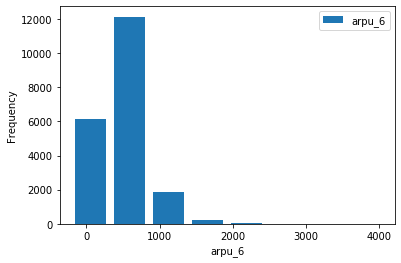

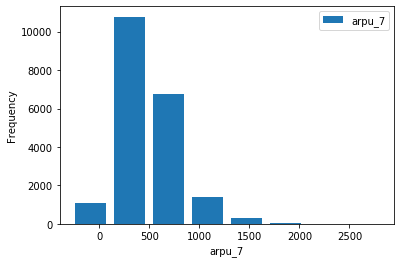

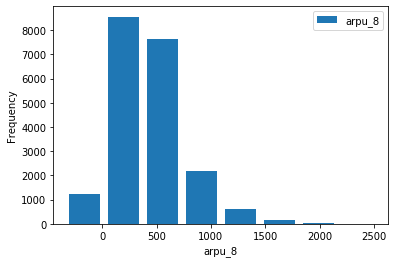

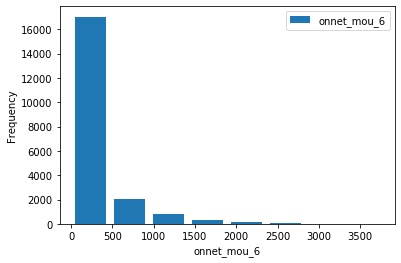

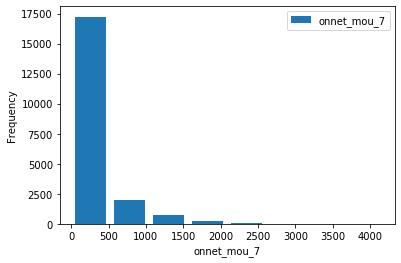

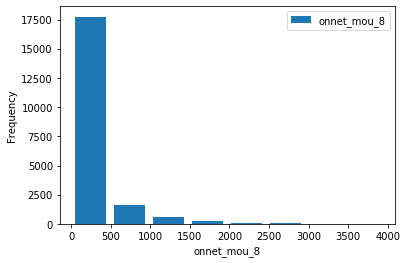

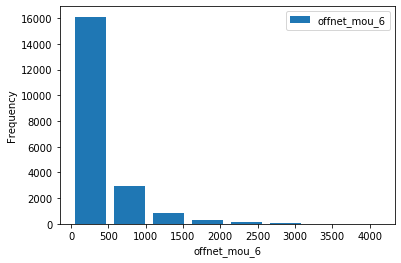

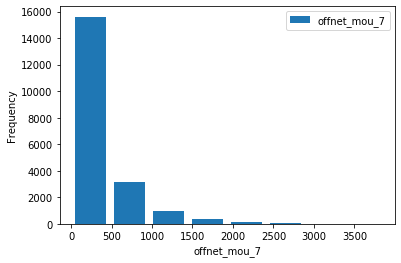

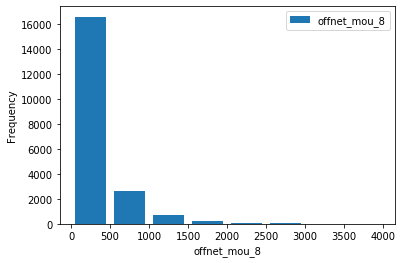

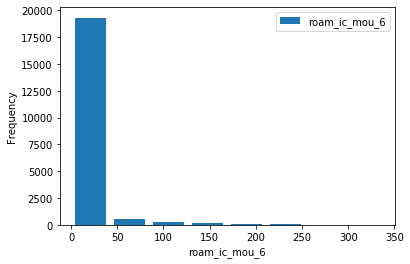

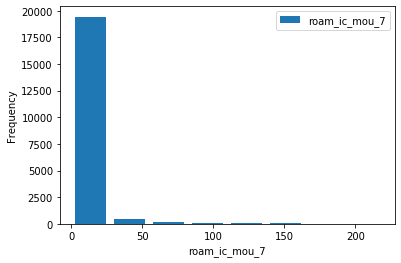

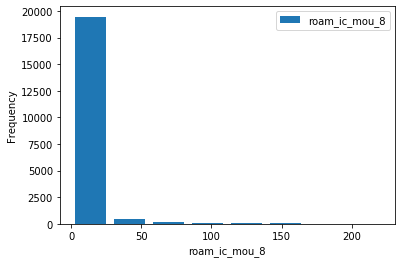

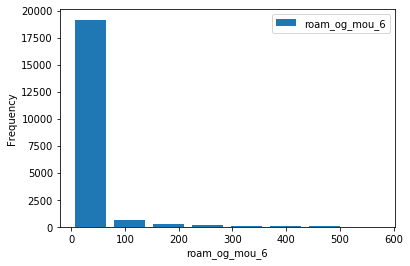

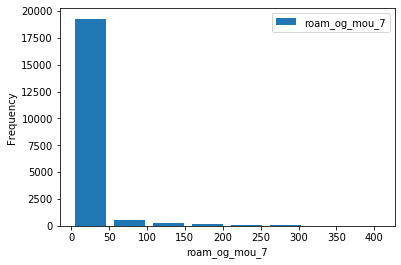

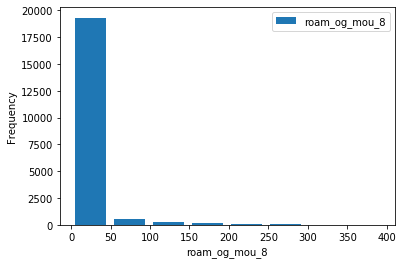

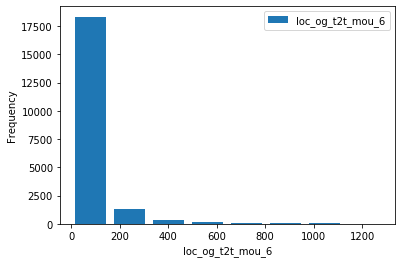

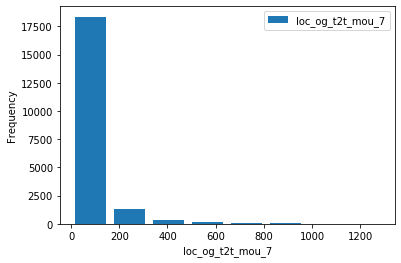

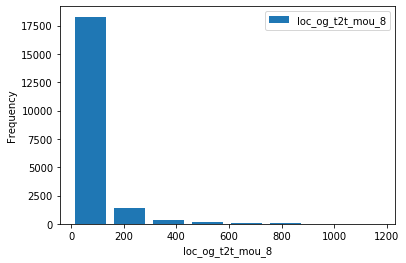

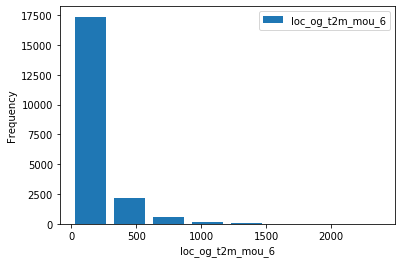

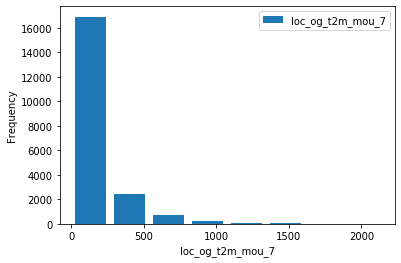

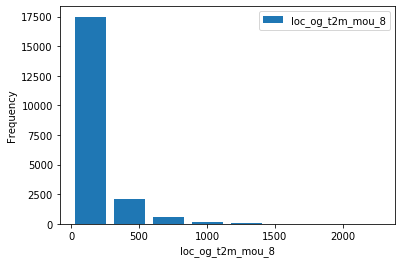

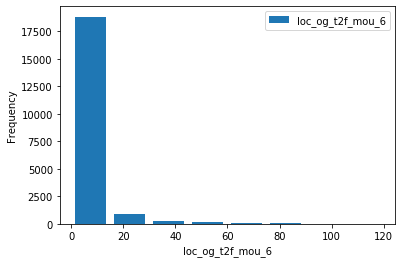

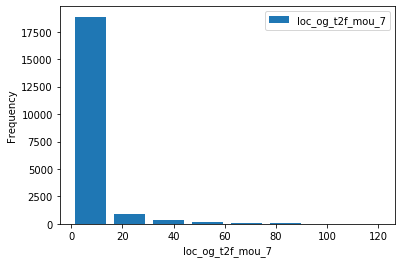

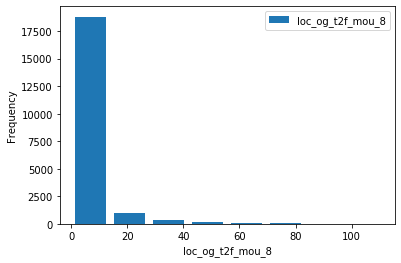

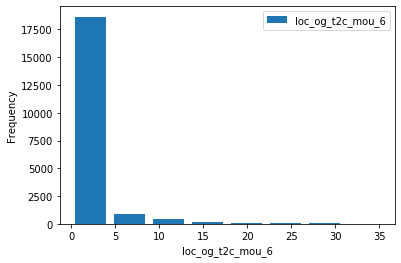

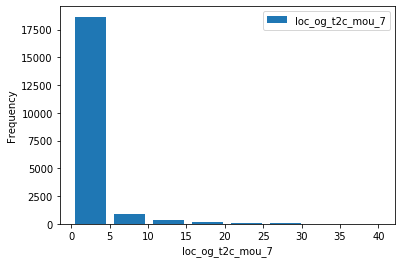

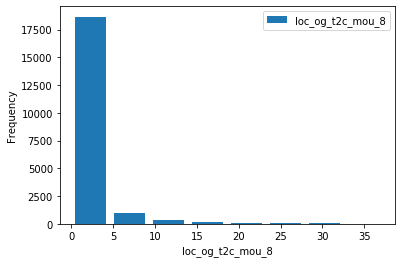

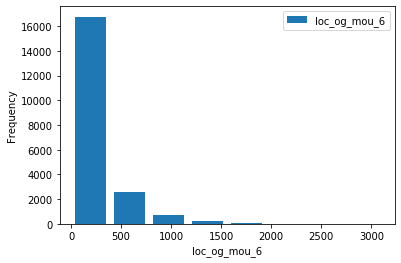

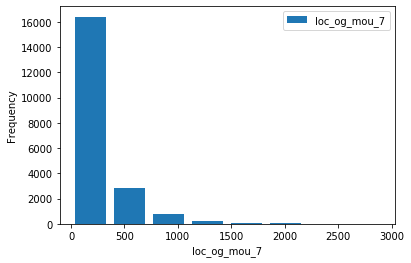

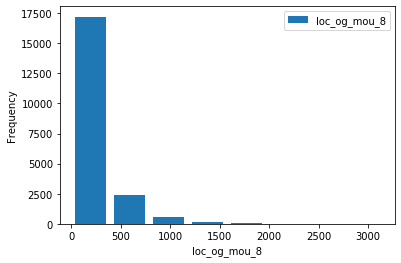

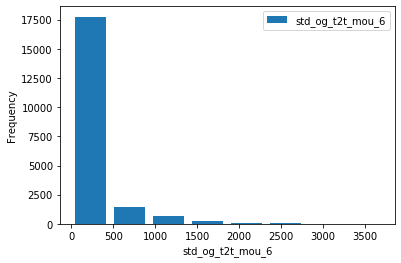

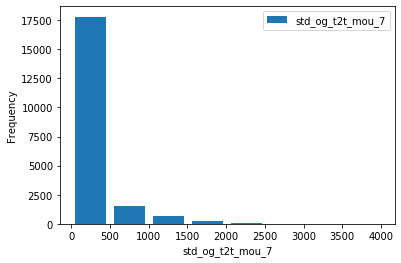

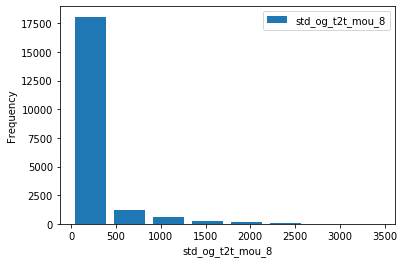

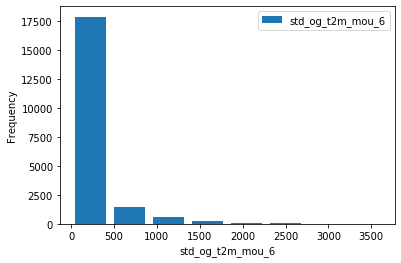

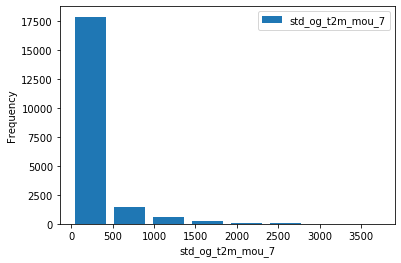

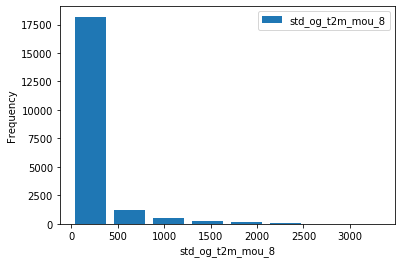

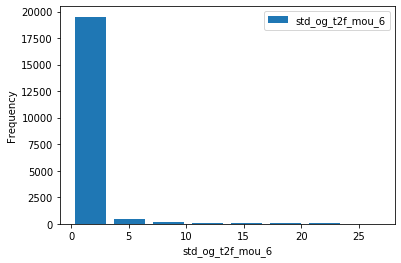

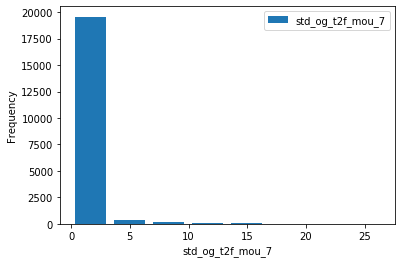

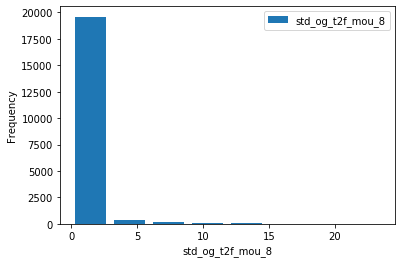

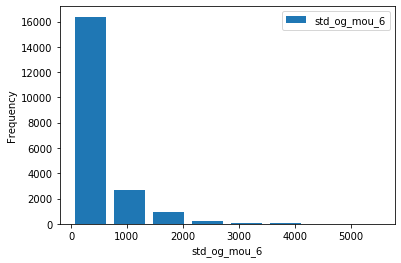

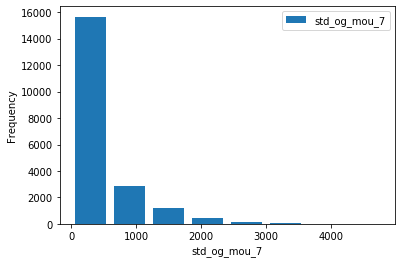

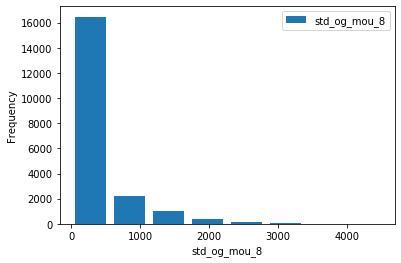

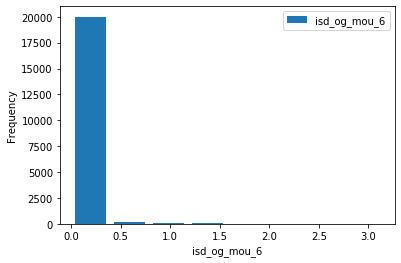

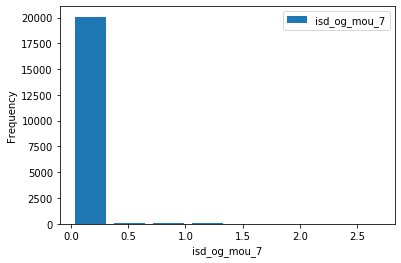

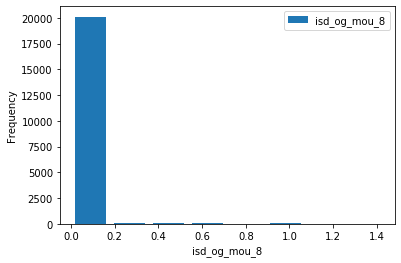

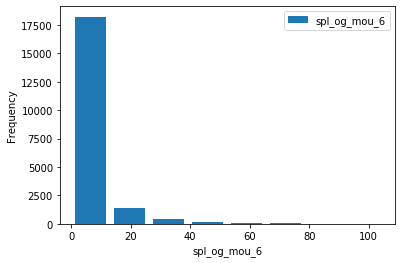

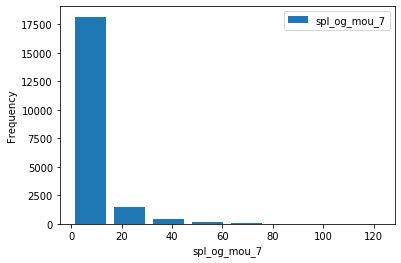

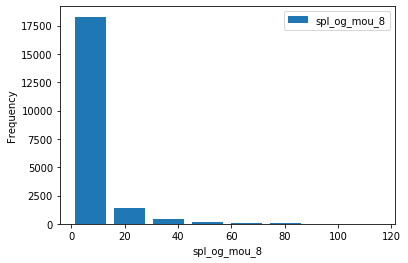

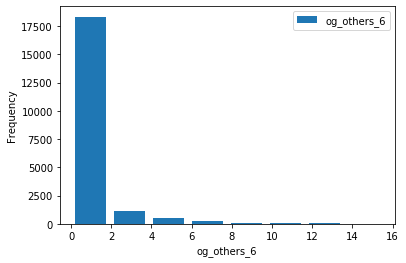

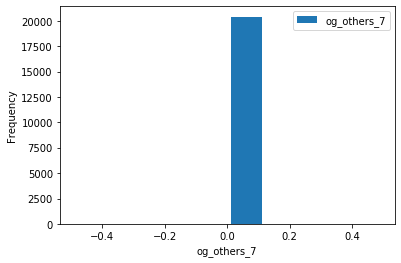

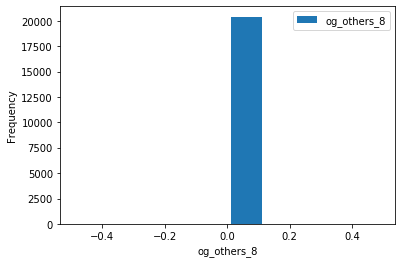

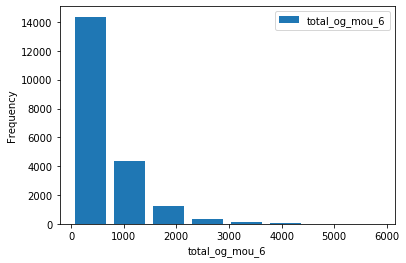

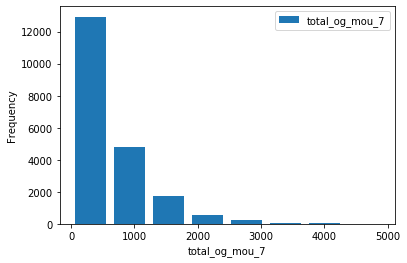

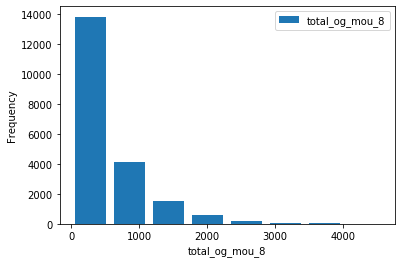

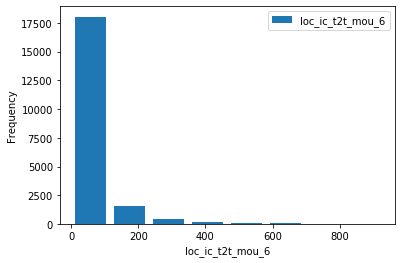

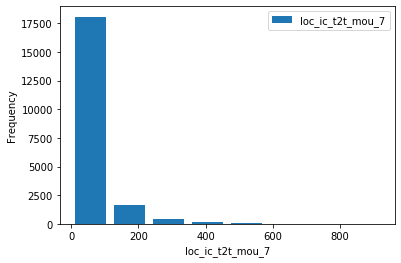

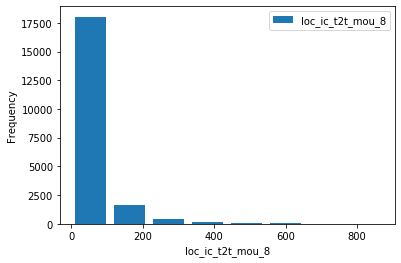

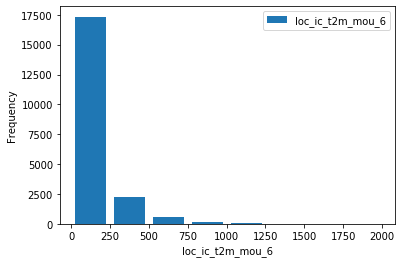

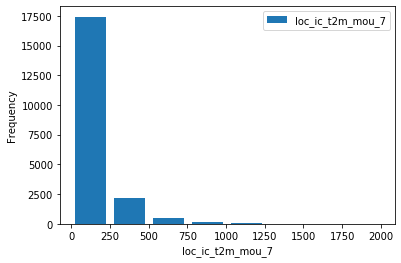

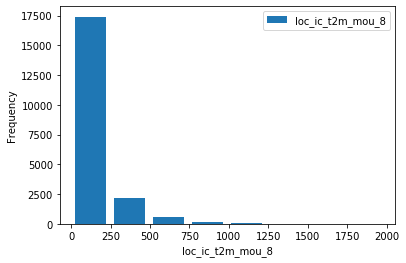

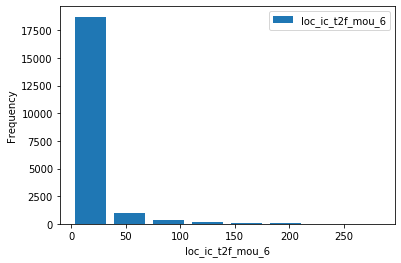

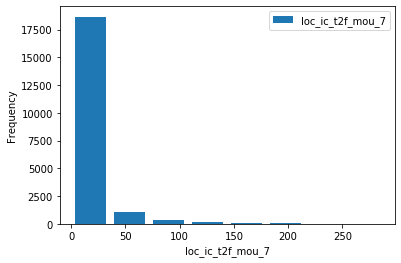

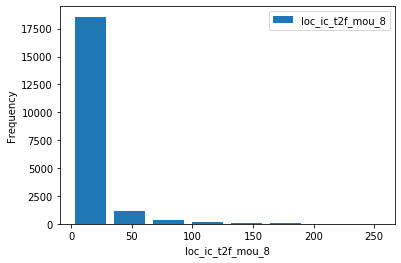

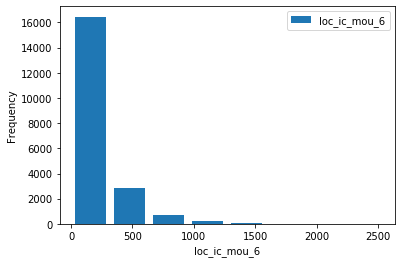

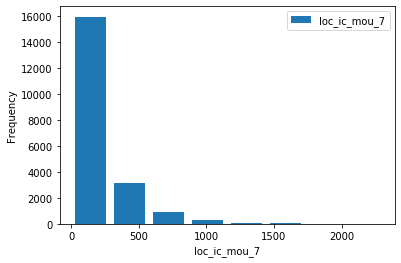

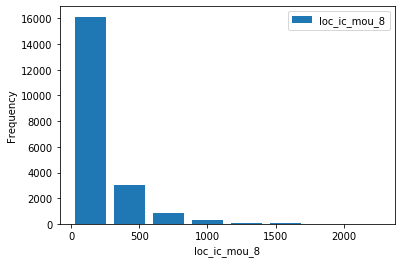

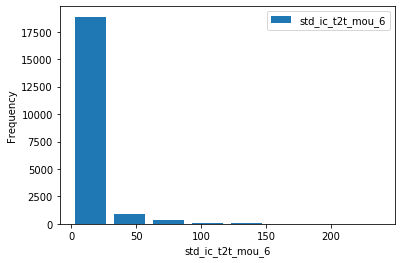

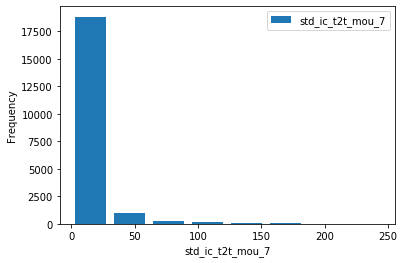

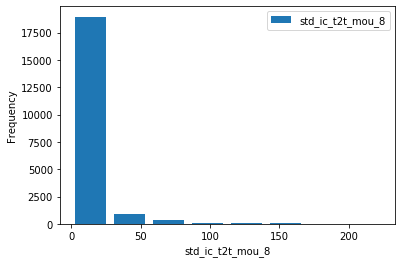

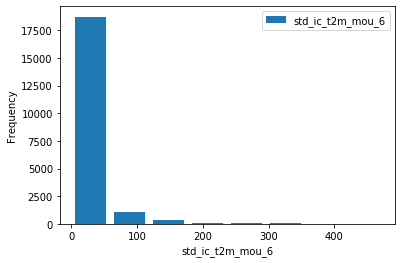

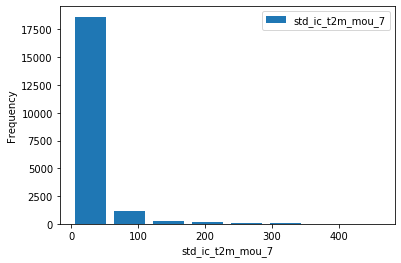

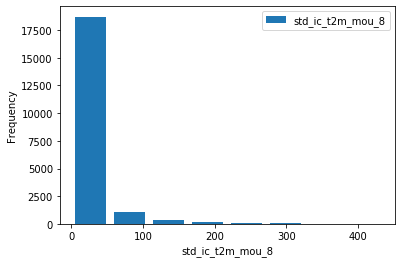

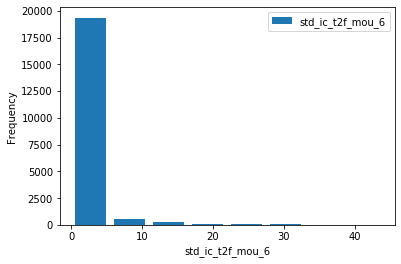

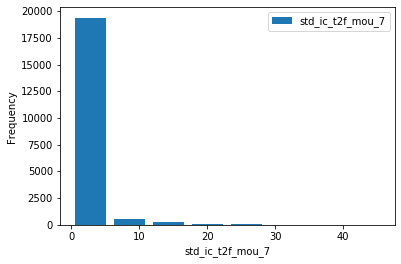

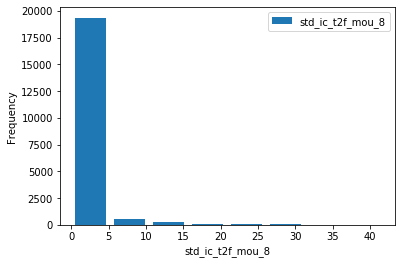

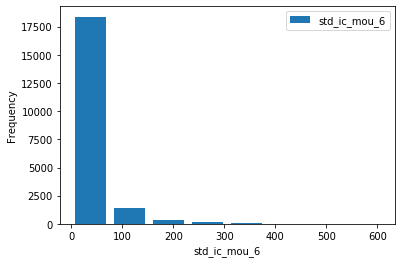

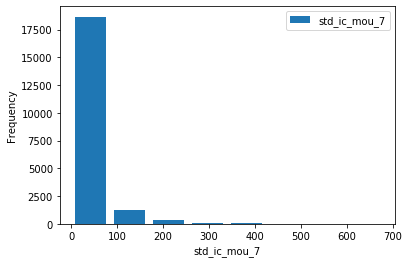

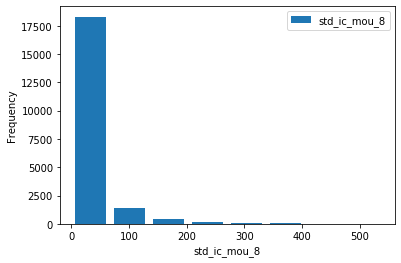

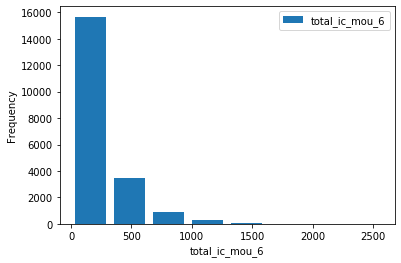

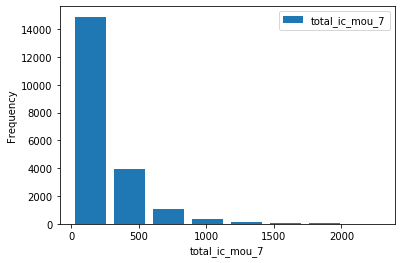

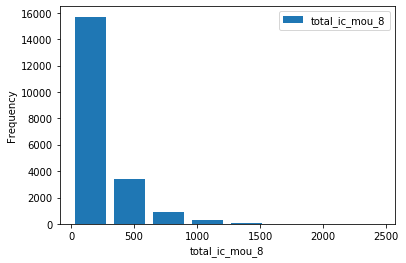

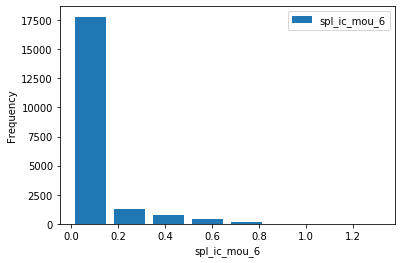

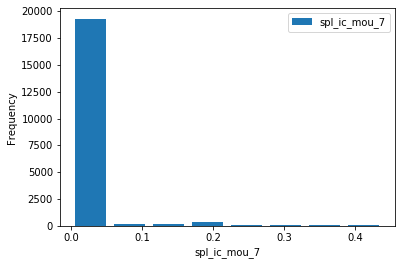

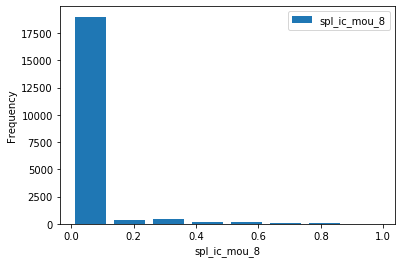

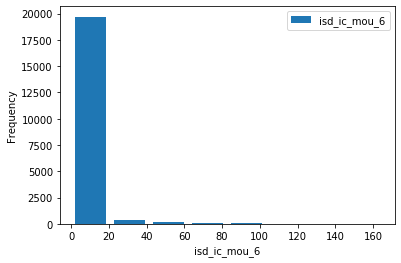

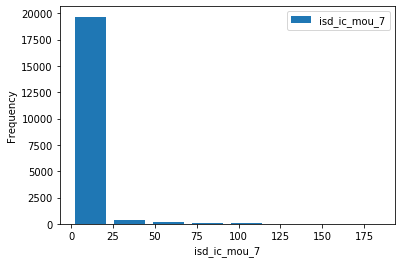

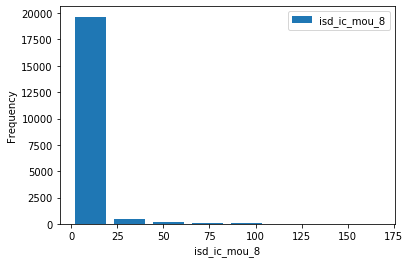

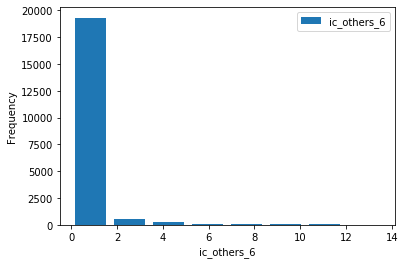

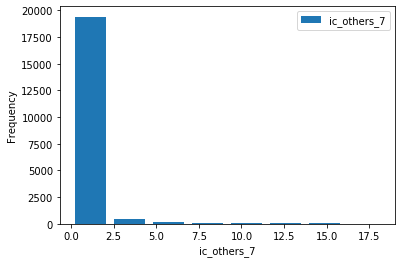

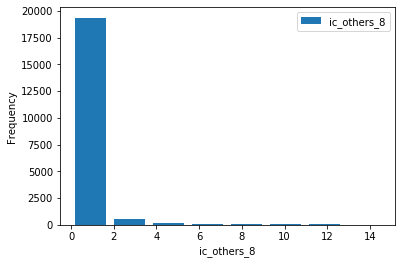

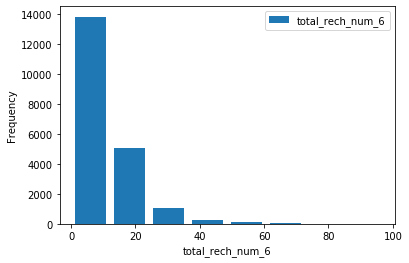

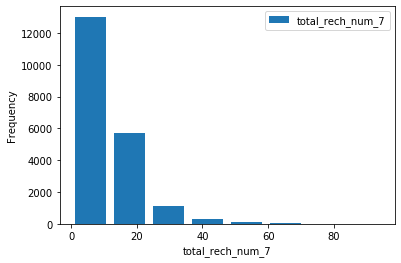

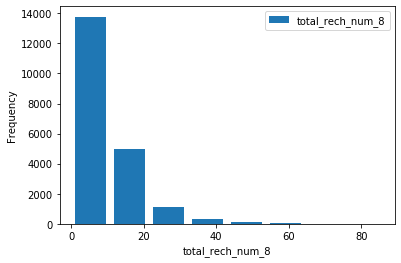

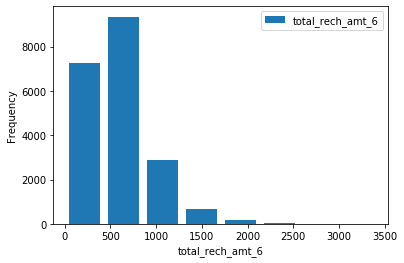

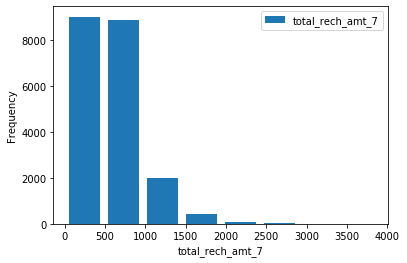

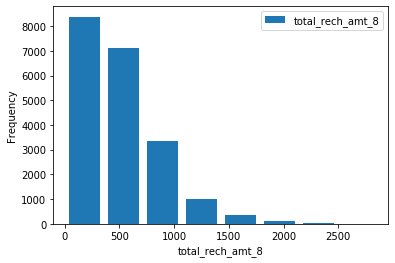

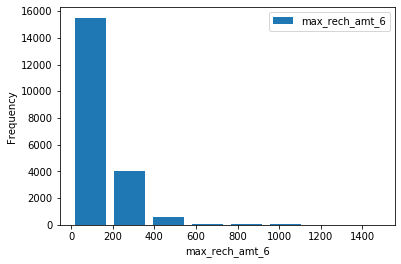

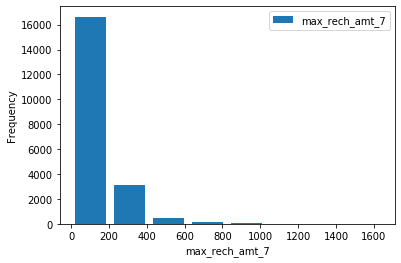

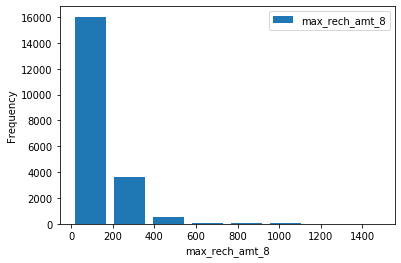

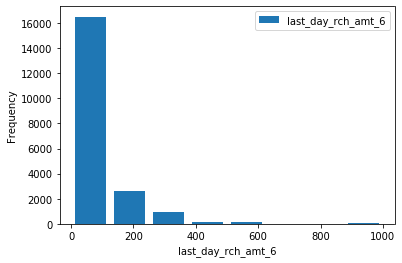

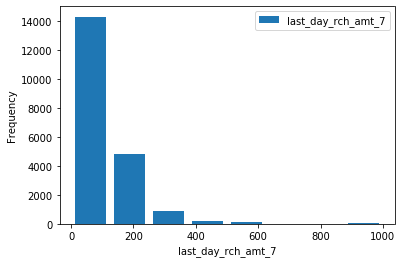

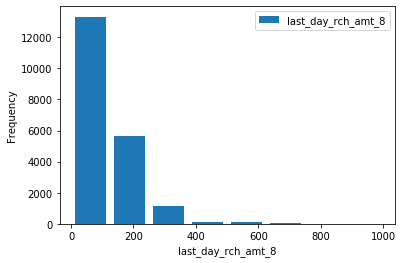

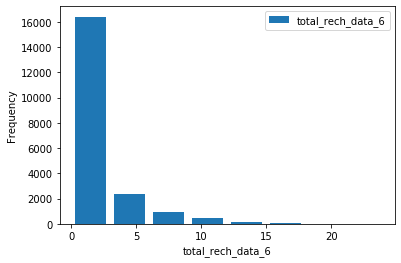

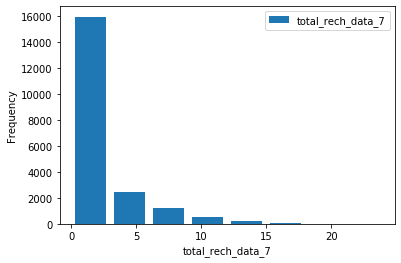

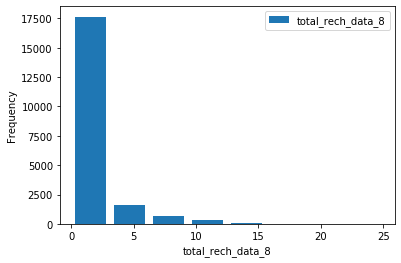

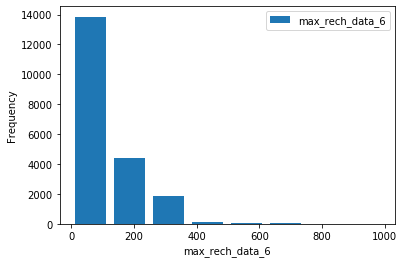

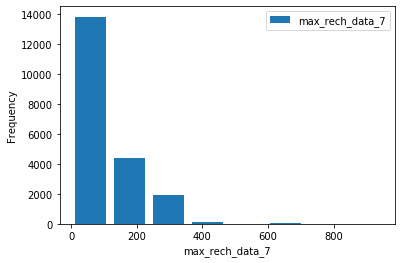

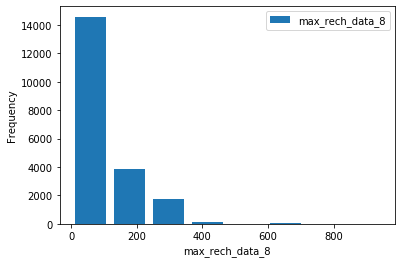

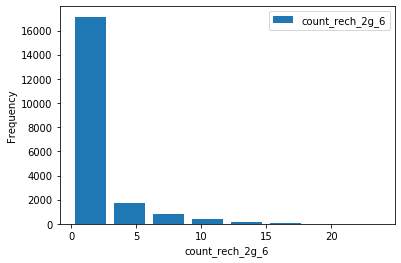

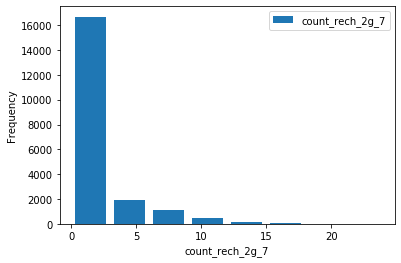

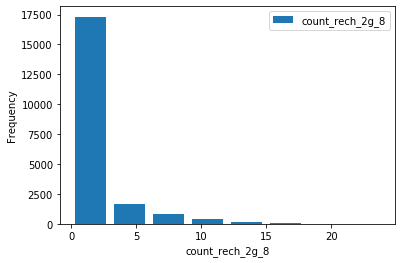

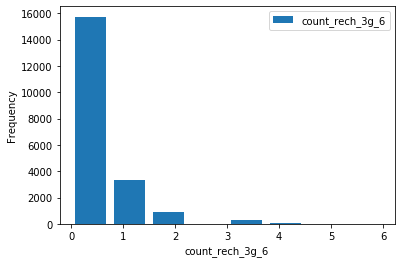

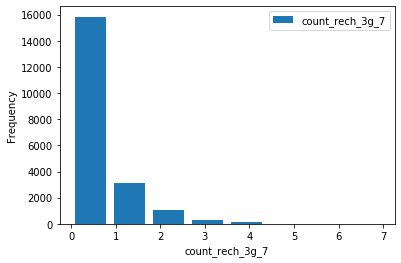

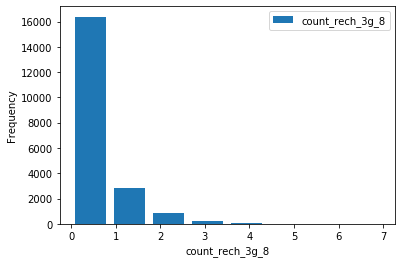

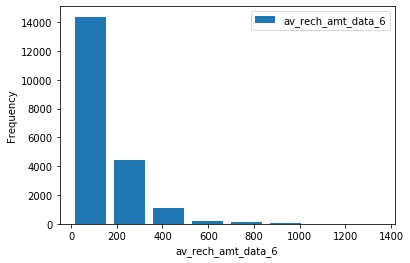

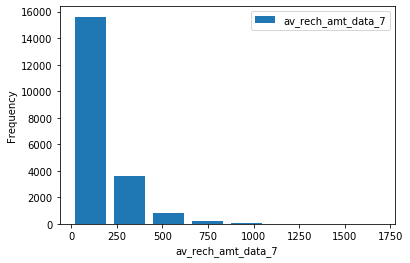

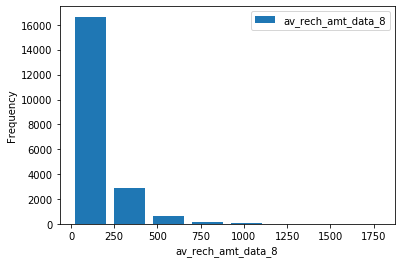

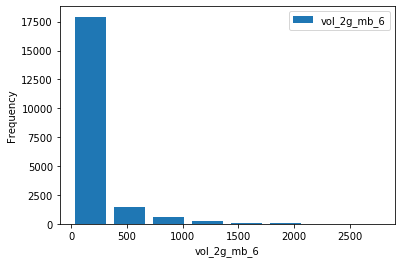

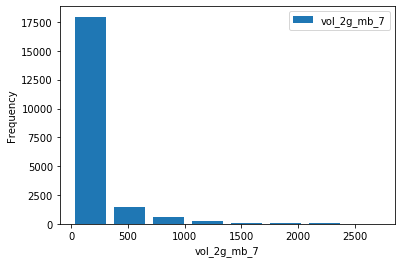

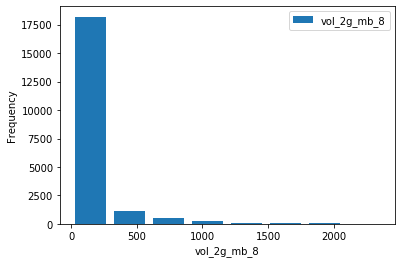

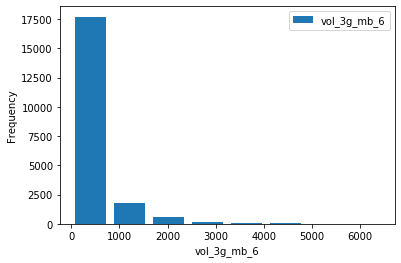

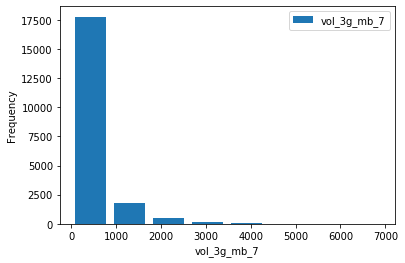

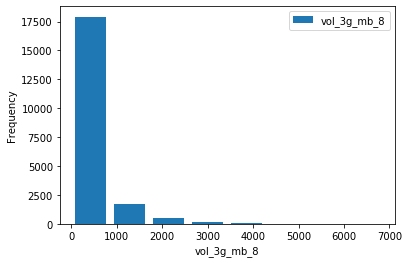

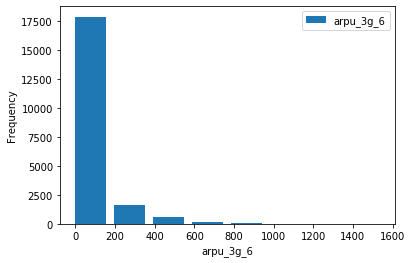

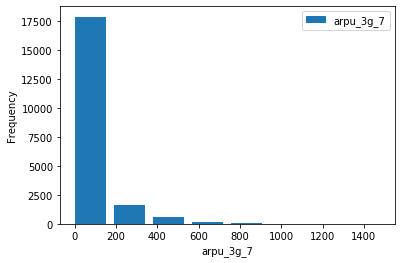

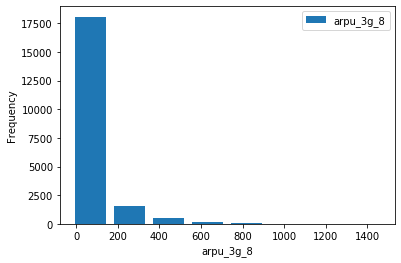

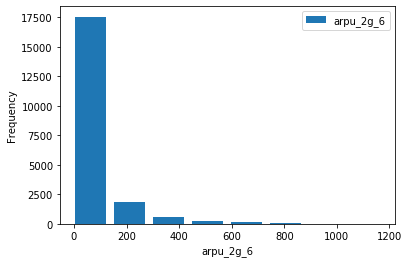

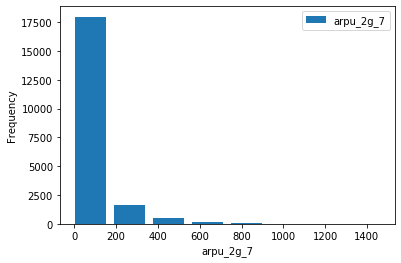

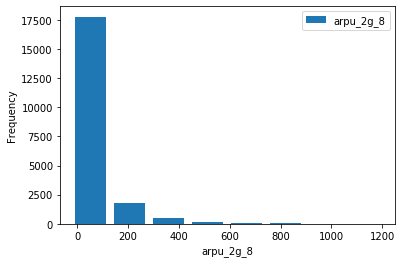

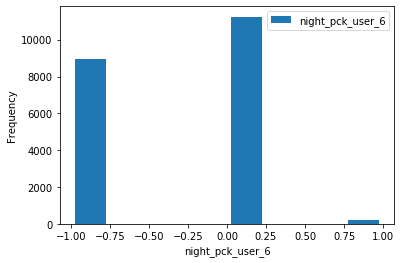

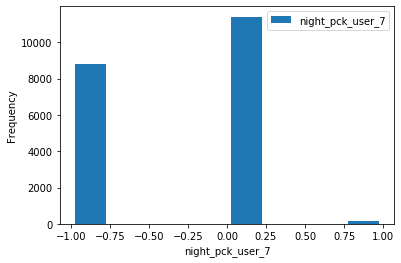

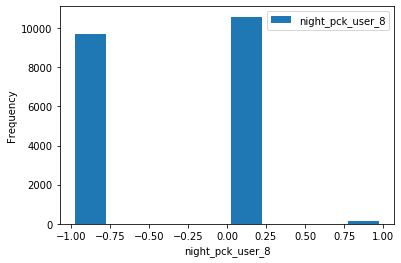

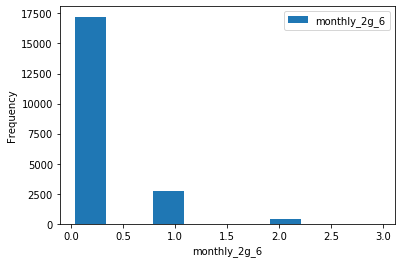

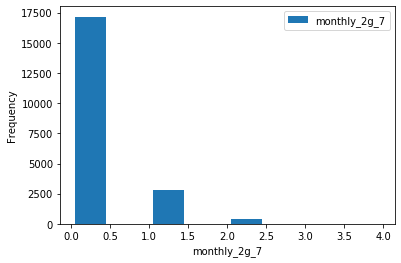

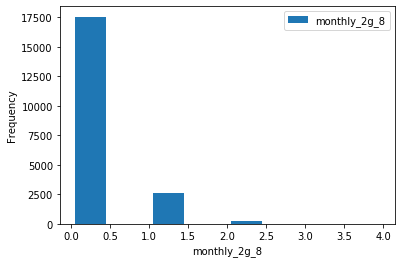

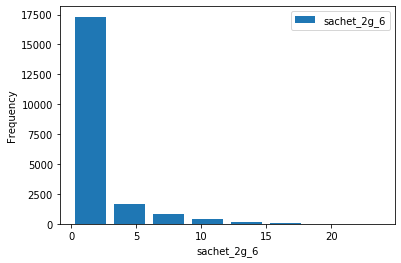

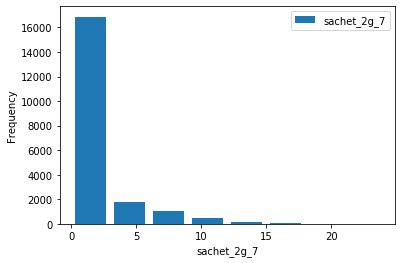

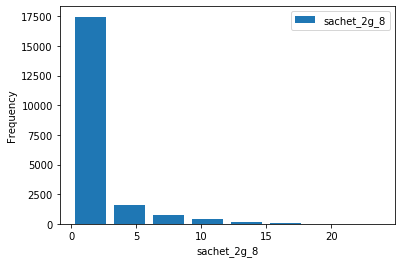

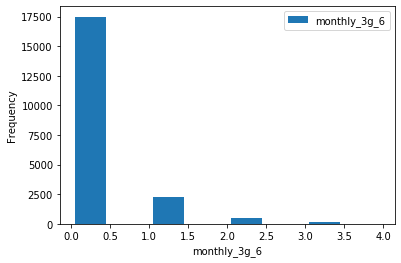

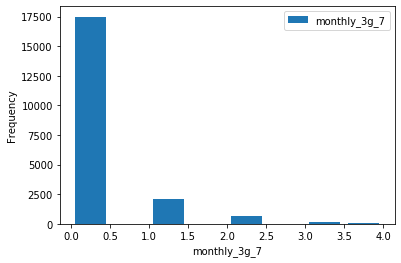

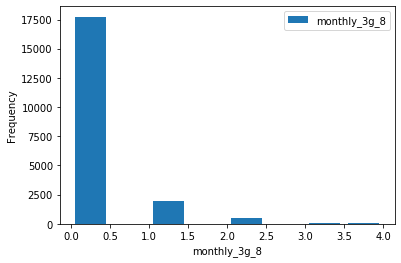

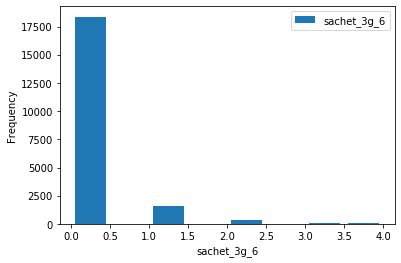

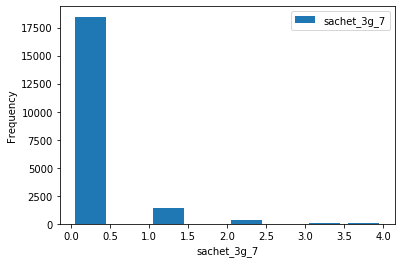

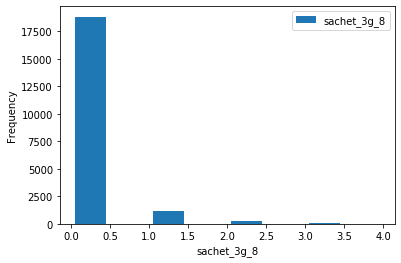

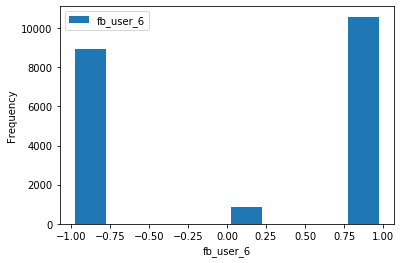

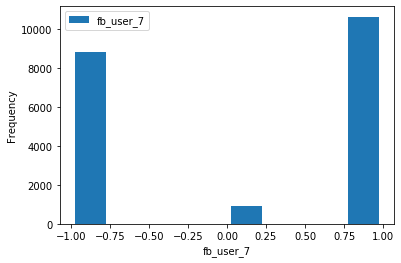

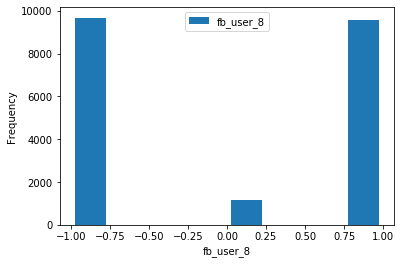

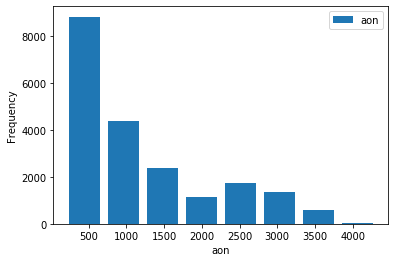

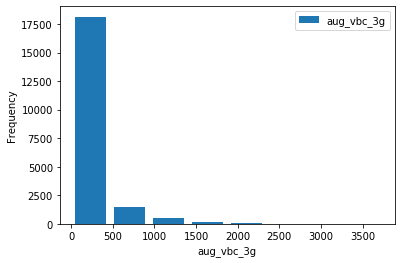

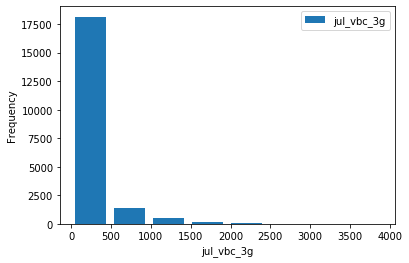

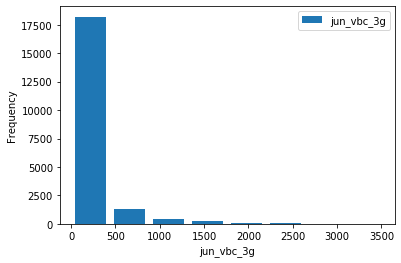

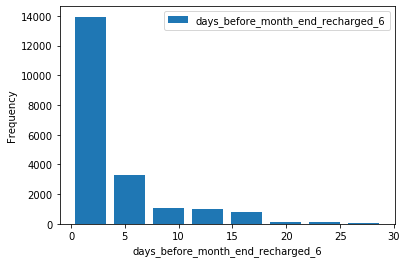

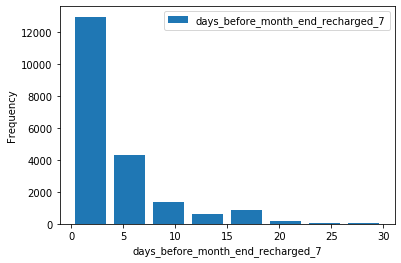

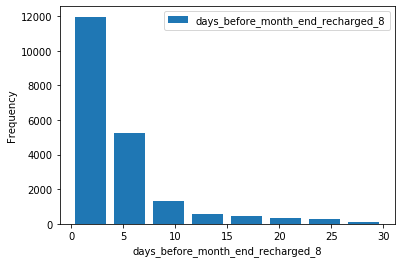

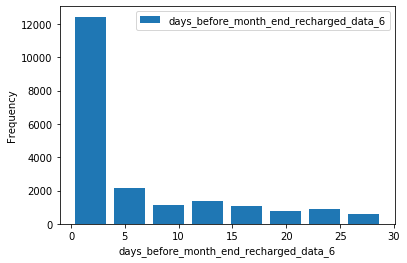

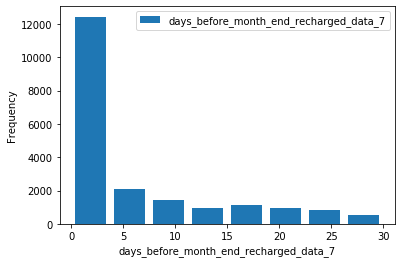

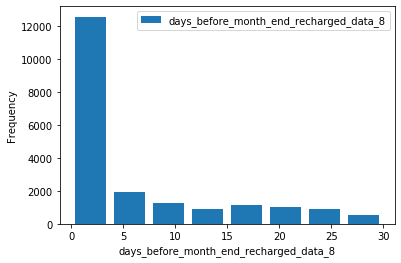

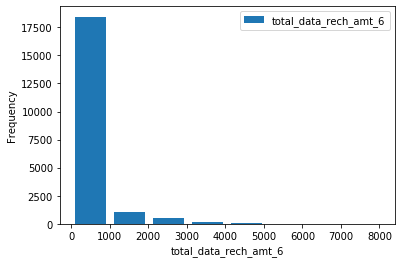

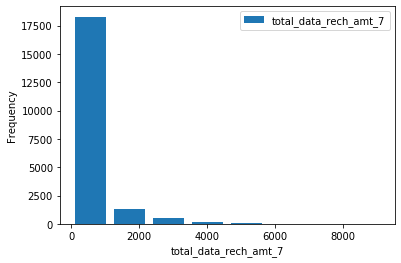

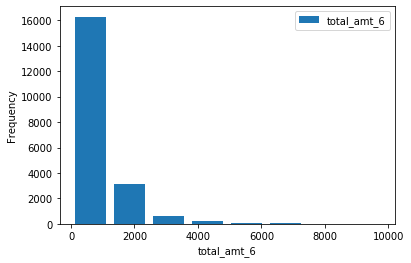

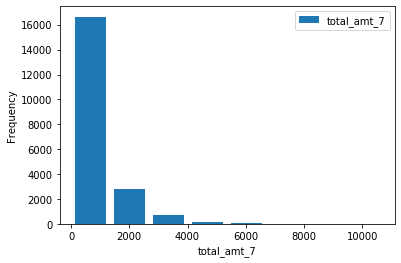

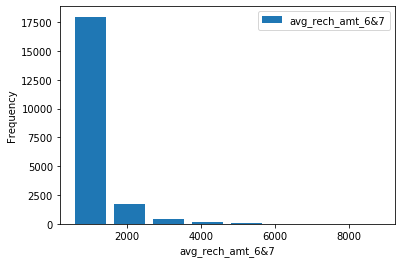

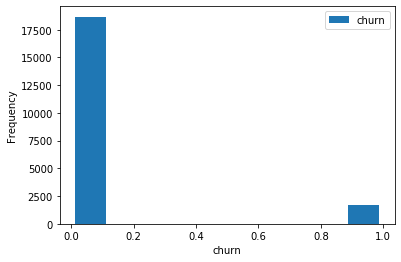

In [287]:
numerics = telecom_hvc.select_dtypes(include=['float64','int64']).columns
len(telecom_hvc[numerics].columns)
plt.figure(figsize=(80,60))
for i in telecom_hvc[numerics].columns:
    telecom_hvc[[str(i)]].plot(kind='hist',bins=8,rwidth=0.8)
    plt.xlabel(i)
    plt.show()
    

### Getting the top Correlation pairs from the Correlation Matrix

In [23]:
numerics = telecom_hvc.select_dtypes(include=['float64','int64']).columns
corr_matrix = telecom_hvc[numerics].corr()
sol = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
for i,j in sol.items():
     if(i[0]=='churn' and (j<-0.11 or j>0.07)):
        print(i,j)

('churn', 'churn') 1.0
('churn', 'std_og_mou_6') 0.14803281752471897
('churn', 'total_og_mou_6') 0.10877181839373318
('churn', 'std_og_t2t_mou_6') 0.10349367763608033
('churn', 'roam_og_mou_7') 0.09004723533549035
('churn', 'onnet_mou_6') 0.08681937543933123
('churn', 'offnet_mou_6') 0.07496644284289063
('churn', 'loc_og_t2t_mou_8') -0.1255394366778859
('churn', 'offnet_mou_8') -0.13702271736535865
('churn', 'loc_ic_t2t_mou_8') -0.14308518439714407
('churn', 'max_rech_data_8') -0.14636984953280008
('churn', 'total_og_mou_8') -0.15325222213820497
('churn', 'av_rech_amt_data_8') -0.15698936544308031
('churn', 'last_day_rch_amt_8') -0.16184349069858844
('churn', 'total_rech_num_8') -0.16857092138246707
('churn', 'loc_og_mou_8') -0.17713205921965625
('churn', 'loc_ic_t2m_mou_8') -0.18263921704568425
('churn', 'loc_ic_mou_8') -0.2017004196285877
('churn', 'night_pck_user_8') -0.20892308134646936
('churn', 'arpu_8') -0.24419297158807468
('churn', 'total_rech_amt_8') -0.24707593111831963


### <font color='red'>Choosing the top +ve and -ve co-efficient pairs with respect to the the `churn` and plotting graphs</font>

### Plotting the Negative coefficients first

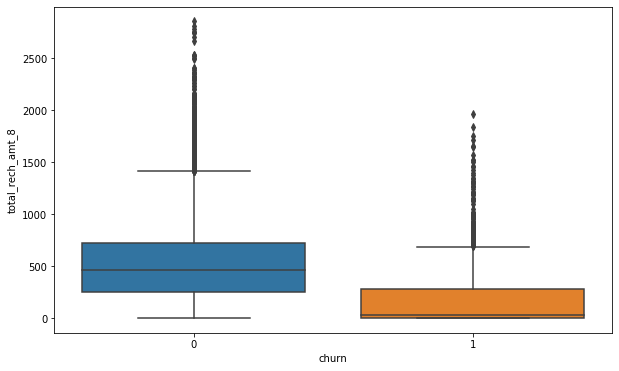

In [24]:
# plot_univariate_Graph('churn','arpu_8','bar')
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'total_rech_amt_8', data = telecom_hvc)
plt.show()

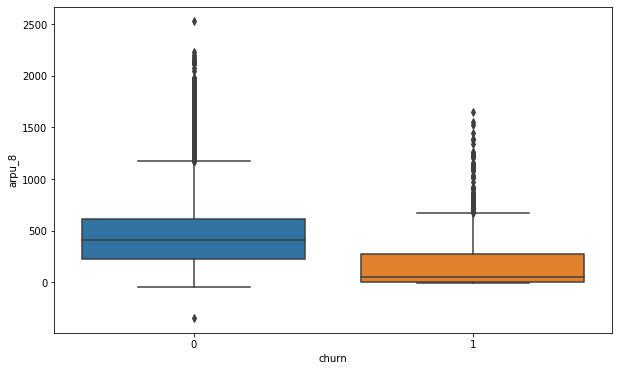

In [25]:
# plot_univariate_Graph('churn','arpu_8','bar')
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'arpu_8', data = telecom_hvc)
plt.show()

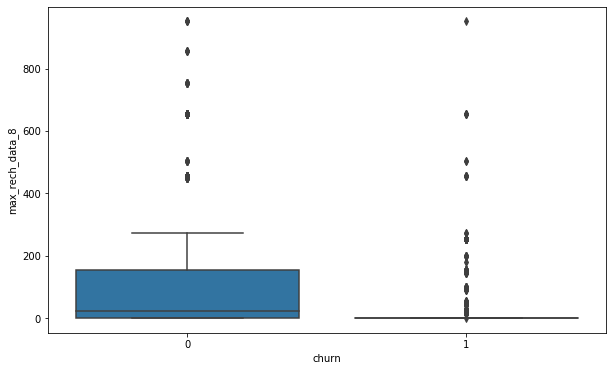

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'max_rech_data_8', data = telecom_hvc)
plt.show()

### Plotting the Positive coefficients

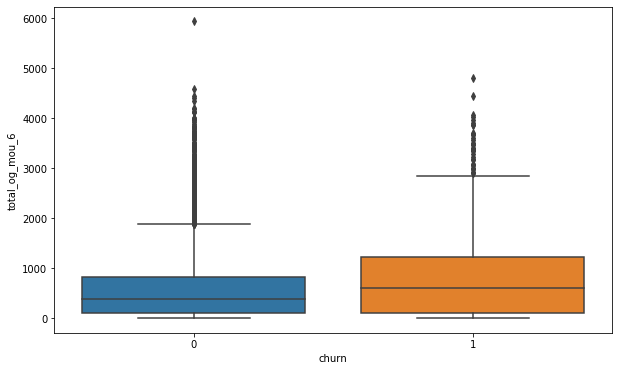

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'total_og_mou_6', data = telecom_hvc)
plt.show()

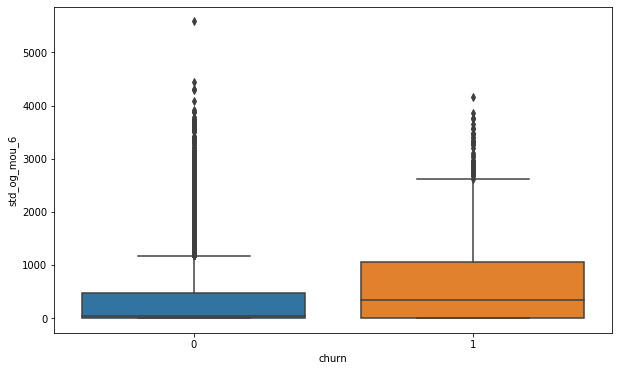

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'std_og_mou_6', data = telecom_hvc)
plt.show()

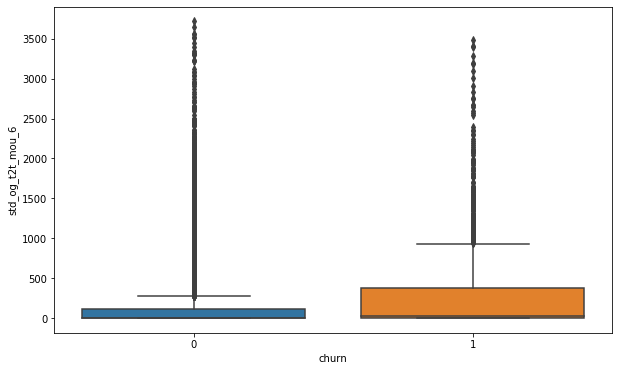

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'churn', y = 'std_og_t2t_mou_6', data = telecom_hvc)
plt.show()

# <font color='blue'>3. Data preparation :

In [30]:
#Converting numerical columns to categorical ones as the values in them are categorical in nature
telecom_hvc[columns_with_Nans_And_Binaries] = telecom_hvc[columns_with_Nans_And_Binaries].astype('category')

# Creating dummy variables for the categorical variables and dropping the level with value '-1'.
dummy_df_1 = pd.get_dummies(telecom_hvc['night_pck_user_6'], prefix='night_pck_user_6')
# Dropping -1 category columns
dummy_df_1 = dummy_df_1.drop(['night_pck_user_6_-1.0'], 1)
# #Adding the results to the master dataframe
telecom_hvc = pd.concat([telecom_hvc,dummy_df_1],axis=1)

dummy_df_2 = pd.get_dummies(telecom_hvc['night_pck_user_7'], prefix='night_pck_user_7')
dummy_df_2 = dummy_df_2.drop(['night_pck_user_7_-1.0'], 1)
telecom_hvc = pd.concat([telecom_hvc,dummy_df_2],axis=1)

dummy_df_3 = pd.get_dummies(telecom_hvc['night_pck_user_8'], prefix='night_pck_user_8')
dummy_df_3 = dummy_df_3.drop(['night_pck_user_8_-1.0'], 1)
telecom_hvc = pd.concat([telecom_hvc,dummy_df_3],axis=1)

dummy_df_4 = pd.get_dummies(telecom_hvc['fb_user_6'], prefix='fb_user_6')
dummy_df_4 = dummy_df_4.drop(['fb_user_6_-1.0'], 1)
telecom_hvc = pd.concat([telecom_hvc,dummy_df_4],axis=1)

dummy_df_5 = pd.get_dummies(telecom_hvc['fb_user_7'], prefix='fb_user_7')
dummy_df_5 = dummy_df_5.drop(['fb_user_7_-1.0'], 1)
telecom_hvc = pd.concat([telecom_hvc,dummy_df_5],axis=1)

dummy_df_6 = pd.get_dummies(telecom_hvc['fb_user_8'], prefix='fb_user_8')
dummy_df_6 = dummy_df_6.drop(['fb_user_8_-1.0'], 1)
telecom_hvc = pd.concat([telecom_hvc,dummy_df_6],axis=1)

# We have created dummies for the variables in list columns_with_Nans_And_Binaries, so we can drop them
telecom_hvc = telecom_hvc.drop(columns_with_Nans_And_Binaries,1)

telecom_hvc.head()


arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385  214.816  213.803         0.00         0.00         0.00   
8   378.721  492.223  137.362       413.69       351.03        35.08   
21  514.453  597.753  637.760       102.41       132.11        85.14   
23   74.350  193.897  366.966        48.96        50.66        33.58   
38  363.987  486.558  393.909       248.99       619.96       666.38   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0           0.00          0.00          0.00            0.0            0.0   
8          94.66         80.63        136.48            0.0            0.0   
21        757.93        896.68        983.39            0.0            0.0   
23         85.41         89.36        205.89            0.0            0.0   
38         88.86         50.58         97.81            0.0            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0             0.0            0.0            0.0            0.0   
8             0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   
38             29.88             17.33              9.48             33.76   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00               0.0   
8              70.58             50.54              0.00               0.0   
21             87.93            104.81              0.75               0.0   
23             83.01            148.56              0.00               0.0   
38             16.19             18.96              0.00               0.0   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   
38              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   
38         63.64         33.53         28.44            219.11   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   
38            602.63            656.89             55.09             34.38   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00               0.0               0.0               0.0   
8              75.69               0.0               0.0               0.0   
21            876.99               0.0               0.0               0.0   
23             39.61               0.0               0.0               0.0   
38             78.84               0.0     

In [31]:
# Putting feature variable to X
X = telecom_hvc.drop(['churn'],axis=1)

# Putting response variable to y
y = telecom_hvc['churn']

### Scaling the Numeric Columns

In [32]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'night_pck_user_7_0.0', 'night_pck_user_7_1.0', 'night_pck_user_8_0.0',
       'night_pck_user_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_7_0.0', 'fb_user_7_1.0', 'fb_user_8_0.0', 'fb_user_8_1.0'],
      dtype='object', length=168)

### Creating the Train and Test splits

In [33]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

# <font color ='blue'>4. Build multiple models and Coming up with Best model based on Model Evaluation and Hyper parameter tuning</font>

### PCA on the data
### <font color='red'> `NOTE: The model to create Predictor variables will not be using the PCA processed Dataset and will be using the Original training splits`<font>

In [34]:
pca = PCA(random_state=42)
pca.fit(X_train)
var_cumu = np.cumsum(pca.explained_variance_ratio_)

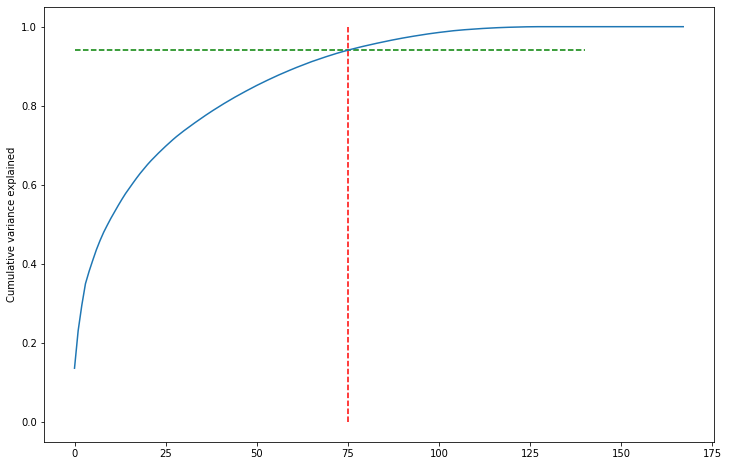

In [35]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.94, xmax=140, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

###  Selecting 75 principle components after PCA. Created separate dataframe `df_train_pca` and `df_test_pca` for building models for prediction.

In [36]:
# Selecting 75 principle components with greater than 94% variance in the data
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=75)
df_train_pca = pca_final.fit_transform(X_train)


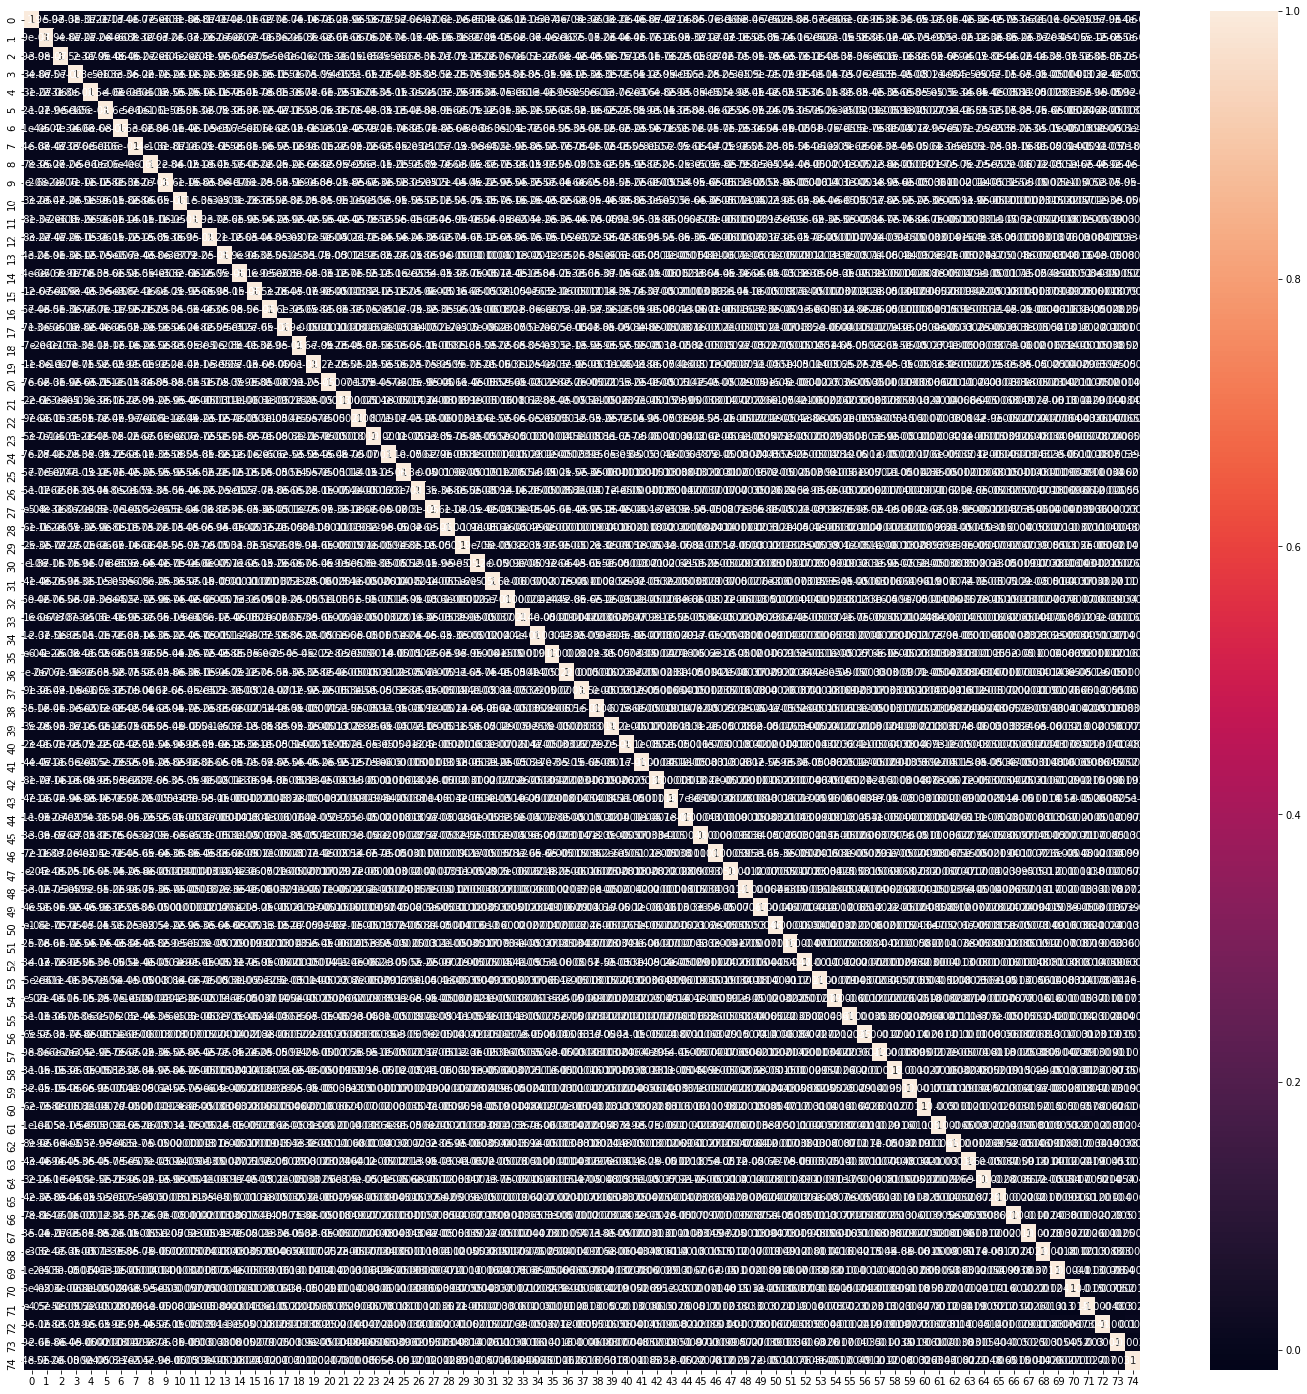

In [106]:
# Checking collinearity between PCA components
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[25,25])
sns.heatmap(corrmat, annot=True)

## As we can see in the heatmap above, that the data is not collinear after PCA

In [41]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6118, 75)

In [42]:
y_test.shape

(6118,)


### Here we will look at the Sensitivity as we want to ensure thats False Negatives are less as per Evaluation Ruberic below
### `Evaluate the models using appropriate evaluation metrics. 'Note that it is more important to identify churners than the non-churners accurately- choose an appropriate evaluation metric which reflects this business goal.`

# <font color='green'>Model 1 : Logistics Regression with PCA</font>

#### Applying logistic regression with `class Weight` to handle `class imbalance` with hyperparameter tuning on the data on our Principal components

In [43]:
# Initializing grid search with logistics model
grid={"C":np.logspace(0,4,10), "penalty":["l1","l2"]} # l1 lasso l2 ridge
logreg=LogisticRegression(class_weight='balanced')
logreg_cv=GridSearchCV(logreg,grid,cv=3)

# Fitting the model
model_pca = logreg_cv.fit(df_train_pca, y_train)

### Making predictions on the test set `df_test_pca`

In [45]:
logreg=LogisticRegression(class_weight='balanced', C=1, penalty= 'l2')

# Fitting the model
model_pca = logreg.fit(df_train_pca, y_train)

In [46]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [47]:
print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Accuracy :",round(logreg_cv.best_score_,2))
print("ROC SCORE:","{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))


Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
Accuracy : 0.83
ROC SCORE: 0.89


In [53]:
y_train_pred = model_pca.predict_proba(df_train_pca)[:,1]

In [54]:
y_train_pred[:10]

array([0.00197613, 0.03689223, 0.69651987, 0.48208355, 0.08353827,
       0.57701717, 0.41552098, 0.3760798 , 0.03483589, 0.07322599])

In [55]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.001976   78020
1      0    0.036892   52939
2      0    0.696520   66632
3      1    0.482084   26622
4      0    0.083538   83291

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [56]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.001976   78020          0
1      0    0.036892   52939          0
2      0    0.696520   66632          1
3      1    0.482084   26622          0
4      0    0.083538   83291          0

In [57]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[10787  2253]
 [  182  1051]]


In [58]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.829398164366286


In [59]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8523925385239254

In [61]:
# Let us calculate specificity
TN / float(TN+FP)

0.8272239263803681

#### Plotting ROC Curve

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

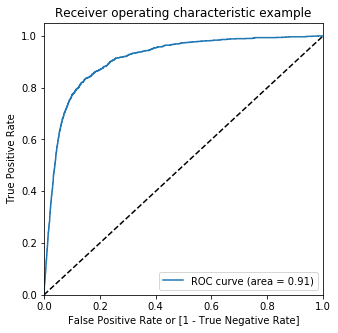

In [63]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [64]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.001976   78020          0    1    0    0    0    0    0    0   
1      0    0.036892   52939          0    1    0    0    0    0    0    0   
2      0    0.696520   66632          1    1    1    1    1    1    1    1   
3      1    0.482084   26622          0    1    1    1    1    1    0    0   
4      0    0.083538   83291          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [65]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086387  1.000000  0.000000
0.1   0.1  0.490717  0.978913  0.444555
0.2   0.2  0.624466  0.956204  0.593098
0.3   0.3  0.712394  0.928629  0.691948
0.4   0.4  0.777132  0.897810  0.765721
0.5   0.5  0.829398  0.852393  0.827224
0.6   0.6  0.869964  0.800487  0.876534
0.7   0.7  0.898690  0.741281  0.913574
0.8   0.8  0.917887  0.622871  0.945782
0.9   0.9  0.921460  0.326845  0.977684


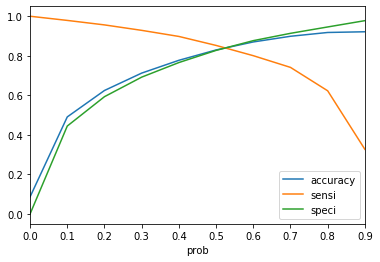

In [66]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above although 0.55 seems to be correct cuttoff ,but we want to keep the sensivity high more than accuracy , so based on the data above for sensitivity and accuracy , we will chose `0.2` to get a good balance between `Sensitivity` and `Accuracy`

In [67]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.001976   78020          0    1    0    0    0    0    0    0   
1      0    0.036892   52939          0    1    0    0    0    0    0    0   
2      0    0.696520   66632          1    1    1    1    1    1    1    1   
3      1    0.482084   26622          1    1    1    1    1    1    0    0   
4      0    0.083538   83291          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [68]:
# Let's check the overall accuracy.
print("Accuracy:",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Accuracy: 0.62446577453934


In [69]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("CONFUSION MATRIX:")
print(confusion2)

CONFUSION MATRIX:
[[7734 5306]
 [  54 1179]]


In [70]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
print("SENSIVITY:",TP / float(TP+FN))

SENSIVITY: 0.9562043795620438


In [72]:
# Let us calculate specificity
print("SPECIFICITY:",TN / float(TN+FP))

SPECIFICITY: 0.5930981595092024


### Predictions on Test Data


In [73]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]

In [74]:
pred_probs_test.shape

(6118,)

In [75]:
pred_probs_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test})
pred_probs_test_final['CustID'] = y_test.index
pred_probs_test_final.head()

Churn  Churn_Prob  CustID
0      0    0.174277   71627
1      0    0.008116   47453
2      0    0.398890   24547
3      0    0.154844   36369
4      0    0.374965   54701

### Creating new column 'predicted' with 1 if Churn_Prob > 0.2 based on the cuttoff chosen in the training data else 0

In [76]:
pred_probs_test_final['predicted'] = pred_probs_test_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Let's see the head
pred_probs_test_final.head()


Churn  Churn_Prob  CustID  predicted
0      0    0.174277   71627          0
1      0    0.008116   47453          0
2      0    0.398890   24547          1
3      0    0.154844   36369          0
4      0    0.374965   54701          1

In [77]:
# Confusion matrix 
confusion = metrics.confusion_matrix(pred_probs_test_final.Churn, pred_probs_test_final.predicted )
print(confusion)

[[3328 2309]
 [  33  448]]


### As we can see , we now have a very low FALSE NEGATIVES as 33

In [78]:
# Let's check the overall accuracy.
print('Accuracy=',metrics.accuracy_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted))

Accuracy= 0.6171951618175875


In [79]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity=',TP / float(TP+FN))

Sensitivity= 0.9313929313929314


In [81]:
# Let us calculate specificity
print('Specificity=',TN / float(TN+FP))

Specificity= 0.5903849565371652


# <font color='green'>Model 2 : RandomForest </font>

In [82]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(2, 20, 5),
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300]    
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced",random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [83]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  3.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [84]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8799131705909294 using {'max_depth': 12, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [85]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             n_estimators=100,
                            n_jobs=-1, class_weight="balanced",random_state = 42)
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### Predictions on Test Data

In [86]:
# predict
predictions = rfc.predict(df_test_pca)

In [87]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      5637
           1       0.36      0.69      0.47       481

    accuracy                           0.88      6118
   macro avg       0.66      0.79      0.70      6118
weighted avg       0.92      0.88      0.89      6118



In [88]:
# Let's check the overall accuracy.
print("Model Accuracy:",0.87)

Model Accuracy: 0.87


In [89]:
confusion = confusion_matrix(y_test,predictions)
print(confusion)

[[5031  606]
 [ 147  334]]


In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [91]:
# Let's see the sensitivity of our Random Forest model
print('Sensitivity=',TP / float(TP+FN))

Sensitivity= 0.6943866943866944


In [92]:
# Let us calculate specificity
print('Specificity=',TN / float(TN+FP))

Specificity= 0.8924960085151676


#### The sensitivity of Random forest model is low as compared to logistics model.

# <font color='green'>Model 3 : XGBoost</font>

### Fit model on training data with default hyperparameters

In [93]:
model = XGBClassifier()
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [94]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_test_pca)

# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 88.01%


### Let's now try tuning the hyperparameters using k-fold CV and adding parameter for class imbalance.
### We'll then use grid search CV to find the optimal values of hyperparameters.

In [95]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {"max_depth" : [2, 5],
              "n_estimators": [200, 400, 600],
              'scale_pos_weight':[8,12,14]
             }       


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train) 

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=Non

In [96]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',model_cv.best_score_,'using',model_cv.best_params_)

We can get accuracy of 0.896041381600718 using {'max_depth': 5, 'n_estimators': 600, 'scale_pos_weight': 12}


In [97]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

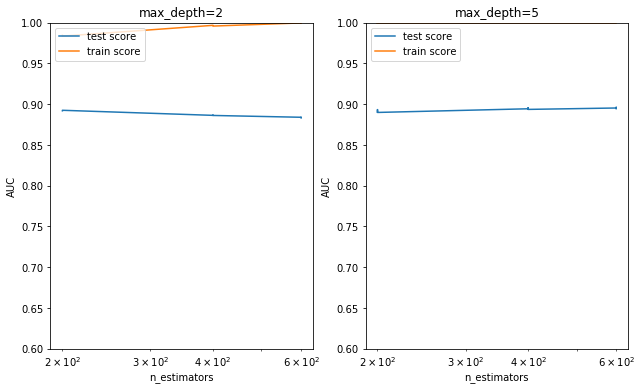

In [98]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {"max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]} 


for n, depth in enumerate(param_grid['max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


### The results above show that:
- The ensemble with max_depth=5 is clearly `overfitting` (training auc is almost 1, while the test score is much lower)
- At max_depth=2, the model performs slightly better (approx 89% AUC) with a higher test score 

### Thus, we should go ahead with `max_depth=2`, `n_estimators=200`and `scale_pos_weight=12`.

In [99]:
# fit model on training data with best hyperparameters
# model = XGBClassifier(params)
model = XGBClassifier(max_depth=2,n_estimators=200,scale_pos_weight=12)
model.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=12, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
y_train_pred = model.predict_proba(df_train_pca)[:,1]

In [101]:
y_train_pred[:10]

array([0.00770138, 0.07757846, 0.8405897 , 0.7961    , 0.0520382 ,
       0.4215919 , 0.708506  , 0.29130235, 0.01810614, 0.18534124],
      dtype=float32)

### Create dataframe `y_train_pred_final` to store Churn probability

In [102]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.007701   78020
1      0    0.077578   52939
2      0    0.840590   66632
3      1    0.796100   26622
4      0    0.052038   83291

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [103]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.007701   78020          0
1      0    0.077578   52939          0
2      0    0.840590   66632          1
3      1    0.796100   26622          1
4      0    0.052038   83291          0

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("CONFUSION MATRIX:");
print(confusion)

CONFUSION MATRIX:
[[11660  1380]
 [   51  1182]]


In [105]:
# Let's check the overall accuracy.
print("ACCURACY OF MODEL:",metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

ACCURACY OF MODEL: 0.8997407692846634


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity:",round((TP / float(TP+FN)),2))

Sensitivity: 0.96


In [108]:
# Let us calculate specificity
print("Specificity:",round((TN / float(TN+FP)),2))

Specificity: 0.89


#### Plotting ROC Curve

In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

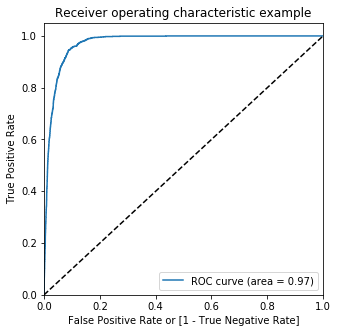

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Finding Optimal Cutoff Point

In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.007701   78020          0    1    0    0    0    0    0    0   
1      0    0.077578   52939          0    1    0    0    0    0    0    0   
2      0    0.840590   66632          1    1    1    1    1    1    1    1   
3      1    0.796100   26622          1    1    1    1    1    1    1    1   
4      0    0.052038   83291          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    1    1    0  
3    1    0    0  
4    0    0    0

In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086387  1.000000  0.000000
0.1   0.1  0.585301  1.000000  0.546089
0.2   0.2  0.735094  0.999189  0.710123
0.3   0.3  0.817908  0.995134  0.801150
0.4   0.4  0.866952  0.980535  0.856212
0.5   0.5  0.899741  0.958637  0.894172
0.6   0.6  0.923001  0.916464  0.923620
0.7   0.7  0.938485  0.852393  0.946626
0.8   0.8  0.947103  0.739659  0.966718
0.9   0.9  0.944511  0.490673  0.987423


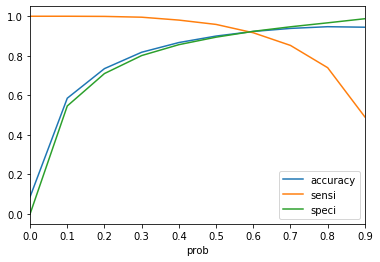

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.6 is the optimum point to take it as a cutoff probability but since we are looking at high sensitivity for churns, we will go with cuttoff `0.2`

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.007701   78020          0    1    0    0    0    0    0    0   
1      0    0.077578   52939          0    1    0    0    0    0    0    0   
2      0    0.840590   66632          1    1    1    1    1    1    1    1   
3      1    0.796100   26622          1    1    1    1    1    1    1    1   
4      0    0.052038   83291          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    1    1    0  
3    1    0    0  
4    0    0    0

In [115]:
# Let's check the overall accuracy.
print("Model Accuracy:",round((metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)),2))

Model Accuracy: 0.74


In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print("Confision Matrix");
confusion2

Confision Matrix


array([[9260, 3780],
       [   1, 1232]])

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity with cutt off ", (TP / float(TP+FN)))

Sensitivity with cutt off  0.9991889699918897


In [119]:
# Let us calculate specificity
print("Specificity with cutt off",(TN / float(TN+FP)))

Specificity with cutt off 0.7101226993865031


### <font color='red'> As we can see the sensitivity greatly improved after choosing the optimum cutoff calculated above</font>

### Predictions on Test Data


In [120]:
pred_probs_test = model.predict_proba(df_test_pca)[:,1]

In [121]:
pred_probs_test.shape

(6118,)

In [122]:
pred_probs_test_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':pred_probs_test})
pred_probs_test_final['CustID'] = y_test.index
pred_probs_test_final.head()

Churn  Churn_Prob  CustID
0      0    0.347824   71627
1      0    0.109658   47453
2      0    0.401883   24547
3      0    0.208555   36369
4      0    0.467666   54701

#### Creating new column 'predicted' with `1` if Churn_Prob > `0.2` else `0`

In [123]:
pred_probs_test_final['predicted'] = pred_probs_test_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

# Let's see the head
pred_probs_test_final.head()
pred_probs_test_final[pred_probs_test_final.Churn!=pred_probs_test_final.predicted].count()


Churn         1762
Churn_Prob    1762
CustID        1762
predicted     1762
dtype: int64

In [124]:
# Confusion matrix 
confusion = metrics.confusion_matrix(pred_probs_test_final.Churn, pred_probs_test_final.predicted )
print(confusion)

[[3932 1705]
 [  57  424]]


In [125]:
# Predicted     not_churn    churn
# Actual
# not_churn        7005      1246
# churn            137       613

# Let's check the overall accuracy.
print('Accuracy=',metrics.accuracy_score(pred_probs_test_final.Churn, pred_probs_test_final.predicted))

Accuracy= 0.7119973847662635


In [126]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity=',TP / float(TP+FN))

Sensitivity= 0.8814968814968815


In [128]:
# Let us calculate specificity
print('Specificity=',TN / float(TN+FP))

Specificity= 0.6975341493702324


<p>__________________________________________________________________________________________________________________________________________________________________________</p>

# <font color ='red'>Model Analysis and Recommendation on Model to use for Prediction based on the results from Test data</font>

<table style="height: 151px; width: 534px; border-color: black;">
<tbody>
<tr style="height: 28px;">
<td style="width: 265px; height: 28px;"><strong>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Model</strong></td>
<td style="width: 76px; height: 28px; text-align: center;"><strong>&nbsp;Accuracy</strong></td>
<td style="width: 171px; height: 28px; text-align: center;"><strong>&nbsp; &nbsp; Sensitivity</strong></td>
<td style="width: 171px; height: 28px; text-align: center;"><strong>Specificity</strong></td>
</tr>
<tr style="height: 26px;">
<td style="width: 265px; height: 26px;"><strong>Logistic Regression</strong></td>
<td style="width: 76px; height: 26px; text-align: center;">0.70</td>
<td style="width: 171px; height: 26px; text-align: center;">0.90</td>
<td style="width: 171px; height: 26px; text-align: center;">0.69</td>
</tr>
<tr style="height: 26px;">
<td style="width: 265px; height: 26px;"><strong>Random Forest</strong></td>
<td style="width: 76px; height: 26px; text-align: center;">0.87</td>
<td style="width: 171px; height: 26px; text-align: center;">0.69</td>
<td style="width: 171px; height: 26px; text-align: center;">0.89</td>
</tr>
<tr style="height: 27px;">
<td style="width: 265px; height: 27px;"><strong>XGBoost</strong></td>
<td style="width: 76px; height: 27px; text-align: center;">0.71</td>
<td style="width: 171px; height: 27px; text-align: center;">0.88</td>
<td style="width: 171px; height: 27px; text-align: center;">0.70</td>
</tr>
</tbody>
</table>

### <font color='red'> Conclusion : __As we need to make sure as per the requirement that we give more importance to getting the churns right__, we need to keep the False Negatives low and True Positive high.  Comparing the above metrics, we would like to recommend `Logistic regression` as it meets  the `sensitivity` metrics ensuring we get the Actual Churns right</font>

<p>______________________________________________________________________________________________________________________________________________________________</p>

# <font color='blue'> 5. Model to identify top predictor variables </font>

## <font color='green'>Logistics model WITHOUT PCA

### Implementing RFE for feature selection

In [129]:
# from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

In [130]:
from sklearn.feature_selection import RFE     
rfe = RFE(logreg, 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [131]:
cols_ranking=list(zip(X_train.columns, rfe.support_, rfe.ranking_))
for tuple_value in cols_ranking:
    if(tuple_value[1]==True):
        print(tuple_value)

('onnet_mou_7', True, 1)
('onnet_mou_8', True, 1)
('offnet_mou_8', True, 1)
('loc_og_t2t_mou_8', True, 1)
('std_og_t2t_mou_7', True, 1)
('std_og_t2t_mou_8', True, 1)
('std_og_t2m_mou_8', True, 1)
('total_og_mou_8', True, 1)
('loc_ic_t2m_mou_8', True, 1)
('loc_ic_mou_7', True, 1)
('total_ic_mou_6', True, 1)
('total_ic_mou_8', True, 1)
('spl_ic_mou_8', True, 1)
('total_rech_num_8', True, 1)
('aon', True, 1)
('days_before_month_end_recharged_data_8', True, 1)
('night_pck_user_8_0.0', True, 1)
('fb_user_8_1.0', True, 1)


In [132]:
# Checking RFE selected variables
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['onnet_mou_7', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_7', 'total_ic_mou_6',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'aon',
       'days_before_month_end_recharged_data_8', 'night_pck_user_8_0.0',
       'fb_user_8_1.0'],
      dtype='object')

In [133]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[rfe_cols]

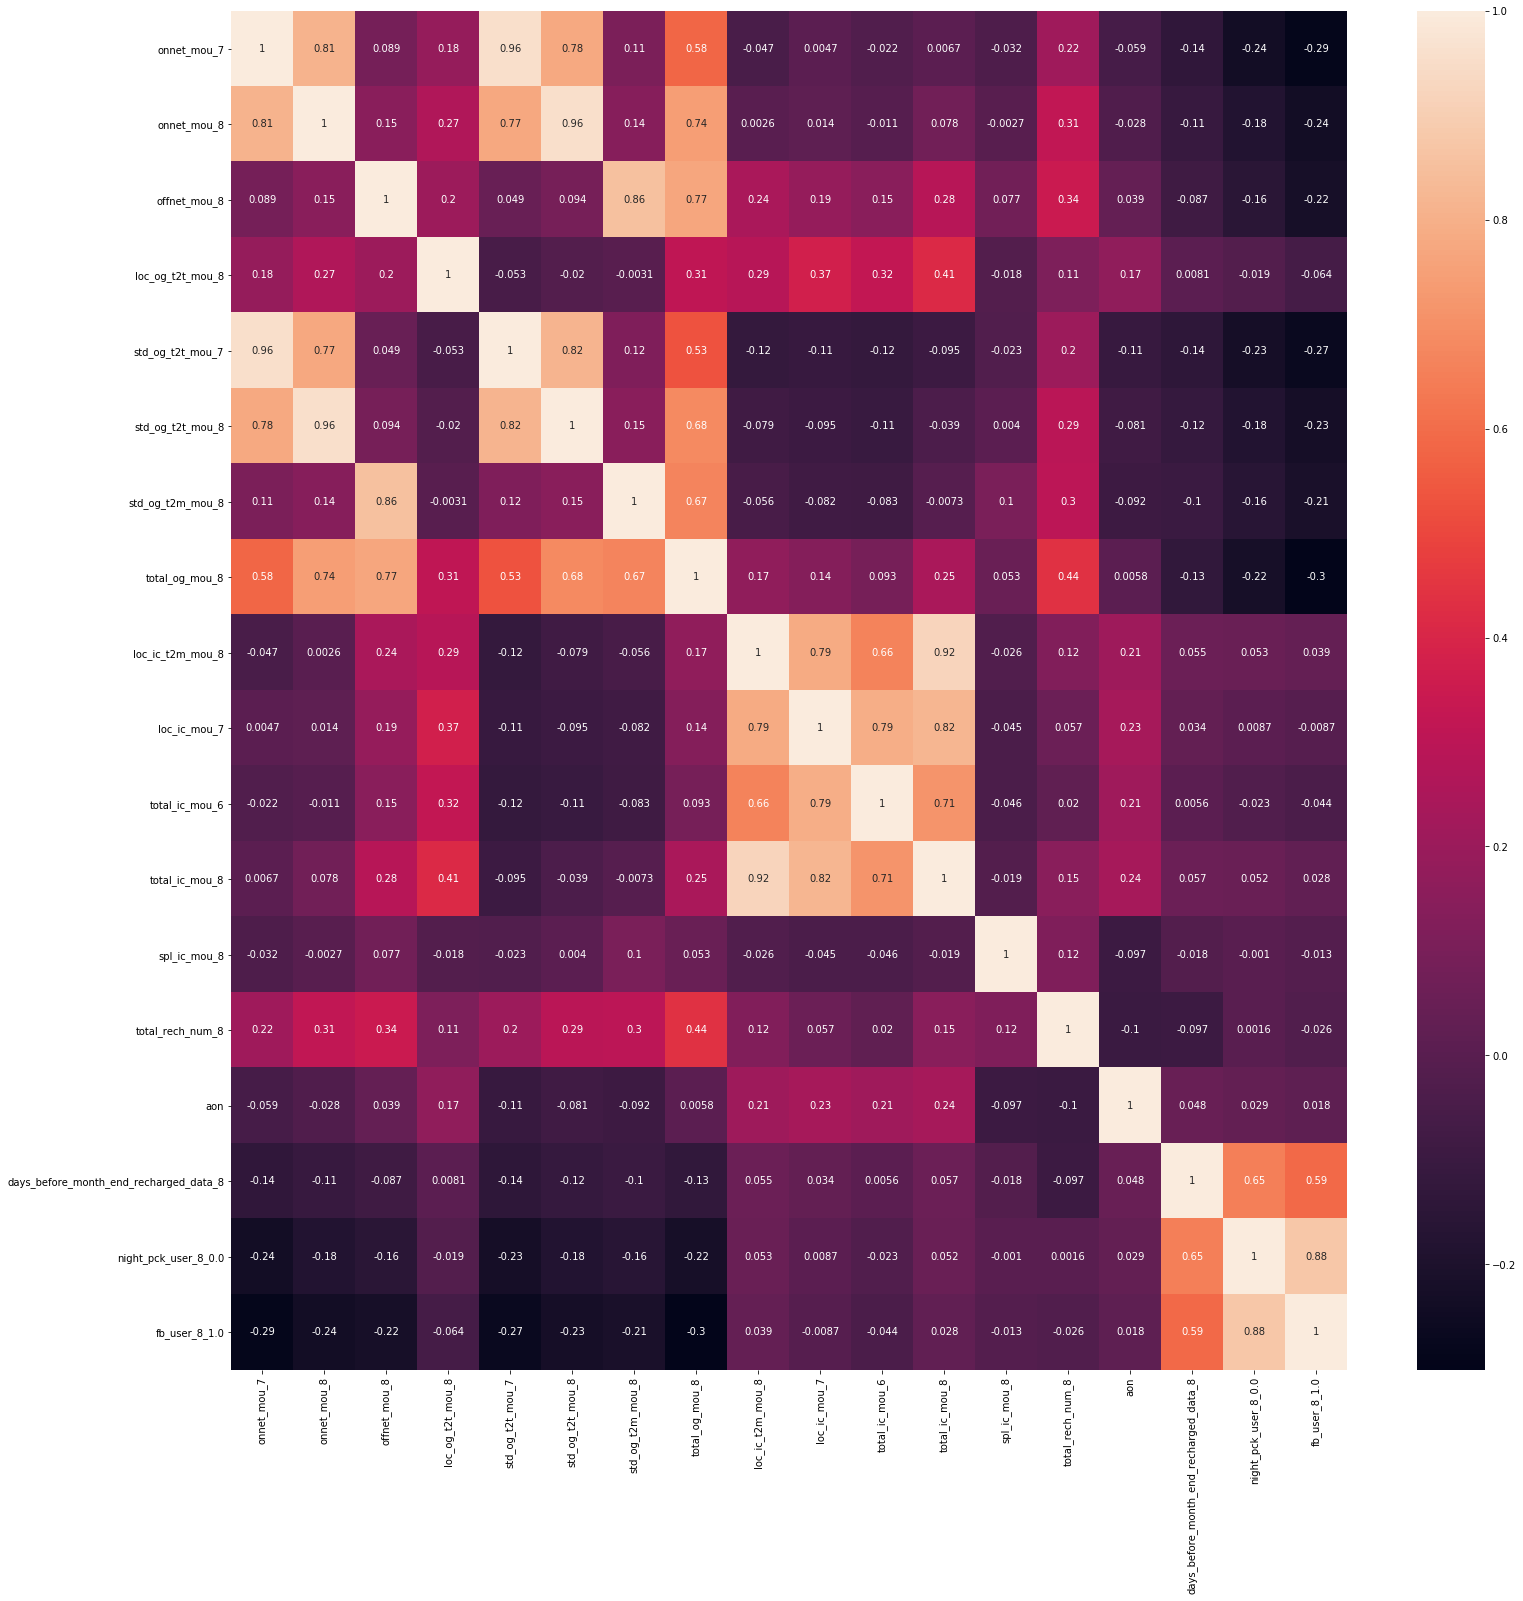

In [134]:
# Plotting heatmap
corrmat = X_train.corr
plt.figure(figsize=(25,25))
sns.heatmap(X_train.corr(), annot=True)


### Building logistics model and use it to remove variables with high VIF and p-values

In [135]:
# Creating a function for building model

import statsmodels.api as sm  

def logistics_model(b,a):
    a_const = sm.add_constant(a)
    log_model = sm.GLM(b,a_const, family = sm.families.Binomial())  # Running the logistics model
    print(log_model.fit().summary())

# Deifining VIF funcion to calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [136]:
#Creating a model and checking summary and vif values
y_train = y_train.values.reshape(-1,1)

logistics_model(y_train,X_train)
VIF(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14254
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.6
Date:                Mon, 06 Jul 2020   Deviance:                       5457.1
Time:                        14:28:57   Pearson chi2:                 4.66e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features      VIF
5                         std_og_t2t_mou_8  1378.43
7                           total_og_mou_8   903.23
1                              onnet_mou_8   629.54
2                             offnet_mou_8   402.21
3                         loc_og_t2t_mou_8   124.19
4                         std_og_t2t_mou_7    35.82
0                              onnet_mou_7    34.78
11                          total_ic_mou_8     9.48
8                         loc_ic_t2m_mou_8     7.80
6                         std_og_t2m_mou_8     5.87
16                    night_pck_user_8_0.0     4.96
17                           fb_user_8_1.0     4.70
9                             loc_ic_mou_7     4.48
10                          total_ic_mou_6     2.84
15  days_before_month_end_recharged_data_8     1.79
13                        total_rech_num_8     1.33
14                                     aon     1.12
12                            spl_ic_mou_8     1.03

<font color='red'>**Now from here onwards we are going to update the model by dropping variables which have p-value > 0.05 (Significance level) and vif > 5.**</font>

In [137]:
# Dropping the variable 'std_og_t2t_mou_8' and updating the model

X_train_new = X_train.drop(["std_og_t2t_mou_8"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14255
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.6
Date:                Mon, 06 Jul 2020   Deviance:                       5457.1
Time:                        14:28:59   Pearson chi2:                 4.66e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features     VIF
6                           total_og_mou_8  286.10
2                             offnet_mou_8  129.68
1                              onnet_mou_8  123.34
4                         std_og_t2t_mou_7   35.81
0                              onnet_mou_7   34.74
10                          total_ic_mou_8    9.48
7                         loc_ic_t2m_mou_8    7.80
5                         std_og_t2m_mou_8    5.85
15                    night_pck_user_8_0.0    4.96
16                           fb_user_8_1.0    4.70
8                             loc_ic_mou_7    4.48
3                         loc_og_t2t_mou_8    3.50
9                           total_ic_mou_6    2.84
14  days_before_month_end_recharged_data_8    1.79
12                        total_rech_num_8    1.33
13                                     aon    1.12
11                            spl_ic_mou_8    1.03

In [138]:
# Dropping the variable 'offnet_mou_8' and updating the model

X_train_new = X_train_new.drop(["offnet_mou_8"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14256
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.5
Date:                Mon, 06 Jul 2020   Deviance:                       5459.1
Time:                        14:29:03   Pearson chi2:                 4.74e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features    VIF
3                         std_og_t2t_mou_7  35.47
0                              onnet_mou_7  34.34
5                           total_og_mou_8  14.00
9                           total_ic_mou_8   9.48
1                              onnet_mou_8   9.26
6                         loc_ic_t2m_mou_8   7.80
4                         std_og_t2m_mou_8   5.79
14                    night_pck_user_8_0.0   4.96
15                           fb_user_8_1.0   4.68
7                             loc_ic_mou_7   4.48
2                         loc_og_t2t_mou_8   3.49
8                           total_ic_mou_6   2.83
13  days_before_month_end_recharged_data_8   1.79
11                        total_rech_num_8   1.33
12                                     aon   1.12
10                            spl_ic_mou_8   1.03

In [139]:
# Dropping the variable 'loc_ic_t2m_mou_8' and updating the model

X_train_new = X_train_new.drop(["loc_ic_t2m_mou_8"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14257
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2731.0
Date:                Mon, 06 Jul 2020   Deviance:                       5461.9
Time:                        14:29:04   Pearson chi2:                 4.84e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features    VIF
3                         std_og_t2t_mou_7  35.38
0                              onnet_mou_7  34.26
5                           total_og_mou_8  13.36
1                              onnet_mou_8   8.85
4                         std_og_t2m_mou_8   5.45
13                    night_pck_user_8_0.0   4.96
14                           fb_user_8_1.0   4.68
6                             loc_ic_mou_7   4.37
8                           total_ic_mou_8   3.83
2                         loc_og_t2t_mou_8   3.41
7                           total_ic_mou_6   2.82
12  days_before_month_end_recharged_data_8   1.79
10                        total_rech_num_8   1.33
11                                     aon   1.12
9                             spl_ic_mou_8   1.03

In [140]:
# Dropping the variable 'loc_og_t2t_mou_8' and updating the model

X_train_new = X_train_new.drop(["loc_og_t2t_mou_8"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14258
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.0
Date:                Mon, 06 Jul 2020   Deviance:                       5466.0
Time:                        14:29:06   Pearson chi2:                 3.85e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features    VIF
0                              onnet_mou_7  15.83
2                         std_og_t2t_mou_7  14.31
4                           total_og_mou_8  13.07
1                              onnet_mou_8   8.81
3                         std_og_t2m_mou_8   5.36
12                    night_pck_user_8_0.0   4.96
13                           fb_user_8_1.0   4.68
5                             loc_ic_mou_7   4.35
7                           total_ic_mou_8   3.75
6                           total_ic_mou_6   2.82
11  days_before_month_end_recharged_data_8   1.79
9                         total_rech_num_8   1.33
10                                     aon   1.12
8                             spl_ic_mou_8   1.03

In [141]:
# Dropping the variable 'std_og_t2t_mou_7' and updating the model

X_train_new = X_train_new.drop(["std_og_t2t_mou_7"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14259
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.3
Date:                Mon, 06 Jul 2020   Deviance:                       5466.6
Time:                        14:29:07   Pearson chi2:                 3.80e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features    VIF
3                           total_og_mou_8  12.75
1                              onnet_mou_8   8.64
2                         std_og_t2m_mou_8   5.23
11                    night_pck_user_8_0.0   4.95
12                           fb_user_8_1.0   4.67
4                             loc_ic_mou_7   4.28
6                           total_ic_mou_8   3.75
0                              onnet_mou_7   3.07
5                           total_ic_mou_6   2.82
10  days_before_month_end_recharged_data_8   1.79
8                         total_rech_num_8   1.33
9                                      aon   1.11
7                             spl_ic_mou_8   1.03

In [142]:
# Dropping the variable 'total_og_mou_8' and updating the model

X_train_new = X_train_new.drop(["total_og_mou_8"], axis = 1)

#Creating a model
logistics_model(y_train,X_train_new)
VIF(X_train_new)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                14273
Model:                            GLM   Df Residuals:                    14260
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2759.0
Date:                Mon, 06 Jul 2020   Deviance:                       5518.0
Time:                        14:29:09   Pearson chi2:                 6.85e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

Features   VIF
10                    night_pck_user_8_0.0  4.94
11                           fb_user_8_1.0  4.62
3                             loc_ic_mou_7  4.26
5                           total_ic_mou_8  3.42
1                              onnet_mou_8  3.16
0                              onnet_mou_7  3.05
4                           total_ic_mou_6  2.82
9   days_before_month_end_recharged_data_8  1.78
7                         total_rech_num_8  1.30
2                         std_og_t2m_mou_8  1.19
8                                      aon  1.10
6                             spl_ic_mou_8  1.03

### <font color='red'>So now all the variables have p-value less than 0.05(Significance level) and vif less than 5.</font>
### <font color='red'>So this is our final Logistic regression model.</font>

### <font color='red'>The top predictor variables based on the coefficient are as follows:</font>

<table style="width: 880px;">
<tbody>
<tr>
<td style="width: 352px; text-align: center;"><strong>Variables</strong></td>
<td style="width: 92.6667px; text-align: center;"><strong>Coefficients</strong></td>
<td style="width: 117.333px; text-align: center;"><strong>Absolute value of coefficients</strong></td>
<td style="width: 290.667px; text-align: center;"><strong>Predictor description</strong></td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>total_ic_mou_8</strong></td>
<td style="width: 92.6667px; text-align: center;">-2.7404</td>
<td style="width: 117.333px; text-align: center;">2.7404</td>
<td style="width: 290.667px; text-align: left;">Total minutes of usage&nbsp; for incoming calls&nbsp; in the month of August</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>fb_user_8_1.0</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.9456</td>
<td style="width: 117.333px; text-align: center;">0.9456</td>
<td style="width: 290.667px; text-align: left;">Users availing Facebook and&nbsp; other social networking subscriptions</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>spl_ic_mou_8</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.7558</td>
<td style="width: 117.333px; text-align: center;">0.7558</td>
<td style="width: 290.667px; text-align: left;">Total minutes of usage&nbsp; for special incoming calls&nbsp; in the month of August</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>days_before_month_end_recharged_data_8</strong></td>
<td style="width: 92.6667px; text-align: center;">0.4859</td>
<td style="width: 117.333px; text-align: center;">0.4859</td>
<td style="width: 290.667px; text-align: left;">No. of days before month end recharge was done in the month of August</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>total_rech_num_8</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.462</td>
<td style="width: 117.333px; text-align: center;">0.462</td>
<td style="width: 290.667px; text-align: left;">Total no. of recharges done in the month of August</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>onnet_mou_8</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.4212</td>
<td style="width: 117.333px; text-align: center;">0.4212</td>
<td style="width: 290.667px; text-align: left;">Same network minutes of usage-August</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>night_pck_user_8_0.0</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.4198</td>
<td style="width: 117.333px; text-align: center;">0.4198</td>
<td style="width: 290.667px; text-align: left;">Users who are not using night packs</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>total_ic_mou_6</strong></td>
<td style="width: 92.6667px; text-align: center;">0.3741</td>
<td style="width: 117.333px; text-align: center;">0.3741</td>
<td style="width: 290.667px; text-align: left;">Total minutes of usage&nbsp; for incoming calls&nbsp; in the month of June</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>loc_ic_mou_7</strong></td>
<td style="width: 92.6667px; text-align: center;">0.3322</td>
<td style="width: 117.333px; text-align: center;">0.3322</td>
<td style="width: 290.667px; text-align: left;">Total minutes of usage&nbsp; for local calls&nbsp; in the month of July</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>aon</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.3251</td>
<td style="width: 117.333px; text-align: center;">0.3251</td>
<td style="width: 290.667px; text-align: left;">No. of days the customer is on the network</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>onnet_mou_7</strong></td>
<td style="width: 92.6667px; text-align: center;">0.218</td>
<td style="width: 117.333px; text-align: center;">0.218</td>
<td style="width: 290.667px; text-align: left;">Same network minutes of usage-July</td>
</tr>
<tr>
<td style="width: 352px; text-align: left;"><strong>std_og_t2m_mou_8</strong></td>
<td style="width: 92.6667px; text-align: center;">-0.1787</td>
<td style="width: 117.333px; text-align: center;">0.1787</td>
<td style="width: 290.667px; text-align: left;">STD outgoing calls from same operator to other operators minutes of usage-August</td>
</tr>
</tbody>
</table>

## - Based on the above models created, we recommend to go with Logistic Regression to find the best predictor and the variable selection model.
## - Since the evaluation metric was not to miss the True Churns, we chose Sensitivity as the parameter over accuracy to select the models.

## <font color='blue'> Recommendations - </font>

 - days_before_month_end_recharged_data_8 - The more the days since the last recharge, higher the chance of churn. So we need to reach out to customer who have not recharged in a while
 - fb_user8_1.0 - People using Social networking plans like Facebook etc have very less chance of Churn, so we need to provide offers on these to customers to prevent churn
 - spl_ic_mou_8 - Customers availing special incoming call services have less chance of churn. We need to provide more offers in this area to prevent churn.
 